# Problem Statement :

X Education, an online course provider for professionals, faces a conversion hurdle. Despite attracting visitors through diverse channels, their typical conversion rate languishes around 30%. Aiming to skyrocket that to 80%, they seek your expertise in building a lead scoring model. This model will analyze leads based on their website activity, contact information, and referral sources, assigning scores that reflect their conversion potential. Armed with this knowledge, the sales team can prioritize high-value leads for targeted nurturing, ultimately driving X Education towards their ambitious conversion goals.

# Import Libraries

In [176]:
# Importing all necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data Reading and Understanding



In [177]:
lead = pd.read_csv("Leads.csv");
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [178]:
lead.tail()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,...,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


In [179]:
lead.shape

(9240, 37)

In [180]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [181]:
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [182]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

A significant number of categorical variables in this dataset suggest the need for dummy variable creation.

Additionally, the presence of numerous null values necessitates appropriate handling.

# Data Cleaning and Preparation

In [183]:
# To check for duplicates
lead.loc[lead.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


No duplicates in the data!



In [184]:
# To convert 'Select' values to NaN
lead = lead.replace('Select', np.nan)

In [185]:
# Let's now check the percentage of missing values in each column

missing_percentage = round(100*(lead.isnull().sum()/len(lead.index)), 2)
missing_percentage

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

As we can see there are many columns with high percentage of null values, we will drop them

## Dropping Columns with Missing Values >=35%

In [186]:
missing_percentage[missing_percentage > 35]

Specialization                        36.58
How did you hear about X Education    78.46
Tags                                  36.29
Lead Quality                          51.59
Lead Profile                          74.19
City                                  39.71
Asymmetrique Activity Index           45.65
Asymmetrique Profile Index            45.65
Asymmetrique Activity Score           45.65
Asymmetrique Profile Score            45.65
dtype: float64

In [187]:
#Droping Columns
lead.drop(columns = missing_percentage[missing_percentage > 35].index, axis=1,inplace=True)
lead.shape

(9240, 27)

In [188]:
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [189]:
lead.isnull().sum().sort_values(ascending=False)


What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
X Education Forums                                  0
A free copy of Mastering The Interview              0
I agree to pay the amount through cheque            0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
Prospect ID                                         0
Newspaper Article                                   0
Magazine                    

Selecting columns with null values below 35% and replacing null values with their most frequent occurrences (modes).

In [190]:
lead['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

**Based on the observed distribution, 'Better Career Prospects' emerges as the most likely candidate for null value imputation.**

In [191]:
lead['What matters most to you in choosing a course'].fillna(lead['What matters most to you in choosing a course'].mode()[0],inplace=True)

In [192]:
lead['What matters most to you in choosing a course'].isnull().sum()

0

In [193]:
lead['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

**Based on the observed distribution, 'Unemployed' emerges as the most likely candidate for null value imputation.**

In [194]:
lead['What is your current occupation'].fillna(lead['What is your current occupation'].mode()[0],inplace=True)

In [195]:
lead['What is your current occupation'].isnull().sum()

0

In [196]:
lead['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

**Based on the observed distribution, 'India' emerges as the most likely candidate for null value imputation.**

In [197]:
lead['Country'].fillna(lead['Country'].mode()[0],inplace=True)

In [198]:
lead['Country'].isnull().sum()

0

In [199]:
lead['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

**Based on the observed distribution, '0.0' emerges as the most likely candidate for null value imputation.**

In [200]:
lead['TotalVisits'].fillna(lead['TotalVisits'].mode()[0],inplace=True)

In [201]:
lead['TotalVisits'].isnull().sum()

0

In [202]:
lead['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64

**Based on the observed distribution, '0.00' emerges as the most likely candidate for null value imputation.**

In [203]:
lead['Page Views Per Visit'].fillna(lead['Page Views Per Visit'].mode()[0],inplace=True)

In [204]:
lead['Page Views Per Visit'].isnull().sum()

0

In [205]:
lead['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

**Based on the observed distribution, 'Email Opened' emerges as the most likely candidate for null value imputation.**

In [206]:
lead['Last Activity'].fillna(lead['Last Activity'].mode()[0],inplace=True)

In [207]:
lead['Last Activity'].isnull().sum()

0

In [208]:
lead['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

**Based on the observed distribution, 'Google' emerges as the most likely candidate for null value imputation.**

In [209]:
lead['Lead Source'].fillna(lead['Lead Source'].mode()[0],inplace=True)

In [210]:
lead['Lead Source'].isnull().sum()

0

In [211]:
lead['Page Views Per Visit'].value_counts()

0.00    2326
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64

**Based on the observed distribution, 'Better Career Prospects' emerges as the most likely candidate for null value imputation.**

In [212]:
lead['Page Views Per Visit'].fillna(lead['Page Views Per Visit'].mode()[0],inplace=True)

In [213]:
lead['Page Views Per Visit'].isnull().sum()

0

In [214]:
lead.isnull().sum().sort_values(ascending=False)


Prospect ID                                      0
Search                                           0
A free copy of Mastering The Interview           0
I agree to pay the amount through cheque         0
Get updates on DM Content                        0
Update me on Supply Chain Content                0
Receive More Updates About Our Courses           0
Through Recommendations                          0
Digital Advertisement                            0
Newspaper                                        0
X Education Forums                               0
Newspaper Article                                0
Magazine                                         0
What matters most to you in choosing a course    0
Lead Number                                      0
What is your current occupation                  0
Country                                          0
Last Activity                                    0
Page Views Per Visit                             0
Total Time Spent on Website    


We've achieved data integrity: Every variable is now fully populated.
The data has been scrubbed clean – not a single null value in sight!



**Based on our analysis so far, variables 'Prospect ID' and 'Lead Number' appear to lack relevance for our current objectives. Consider removing them to streamline the analysis.**

In [215]:
# Dropping the "Prospect ID" and "Lead Number"
lead.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

The nunique method to count the number of unique values in each column and then filters the columns where the count is equal to 1 (meaning only one distinct value exists).

In [216]:
columns_with_no_distinct_values = lead.columns[lead.nunique() == 1]

print(columns_with_no_distinct_values)

Index(['Magazine', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque'],
      dtype='object')


In [217]:
lead[columns_with_no_distinct_values].head(10)

,Magazine,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque
0,No,No,No,No,No
1,No,No,No,No,No
2,No,No,No,No,No
3,No,No,No,No,No
4,No,No,No,No,No
5,No,No,No,No,No
6,No,No,No,No,No
7,No,No,No,No,No
8,No,No,No,No,No
9,No,No,No,No,No


In [218]:
lead[columns_with_no_distinct_values].tail(10)

,Magazine,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque
9230,No,No,No,No,No
9231,No,No,No,No,No
9232,No,No,No,No,No
9233,No,No,No,No,No
9234,No,No,No,No,No
9235,No,No,No,No,No
9236,No,No,No,No,No
9237,No,No,No,No,No
9238,No,No,No,No,No
9239,No,No,No,No,No


In [219]:
lead.drop(columns = columns_with_no_distinct_values,axis=1, inplace = True)

Columns with zero variance offer limited information for analysis. Removing them could simplify the data and improve model efficiency.

In [220]:
columns_with_no_distinct_values = lead.columns[lead.nunique() == 1]
print(columns_with_no_distinct_values)

Index([], dtype='object')


In [221]:
categorical_columns = lead.select_dtypes(include='object').columns
categorical_columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

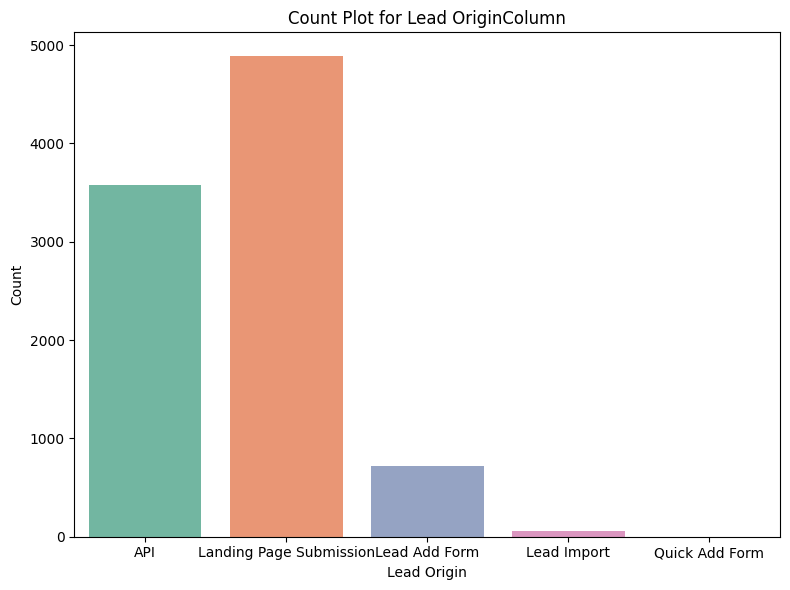

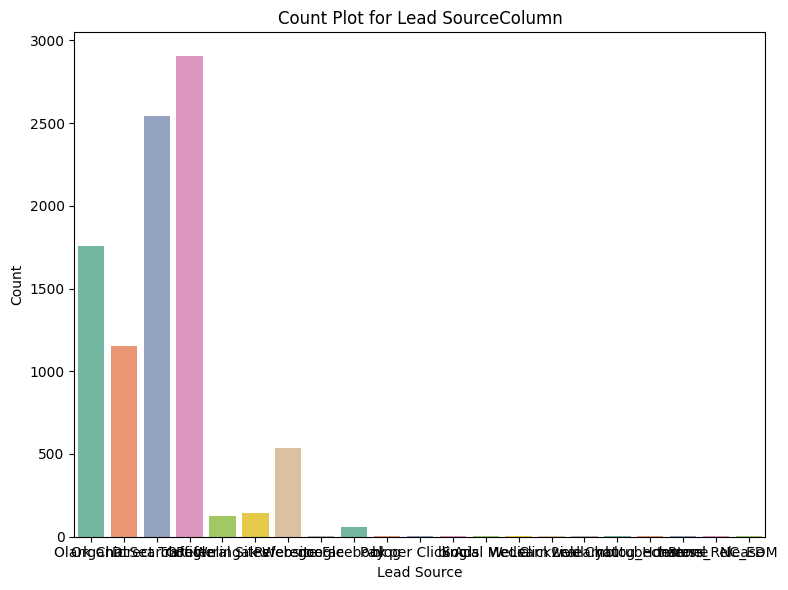

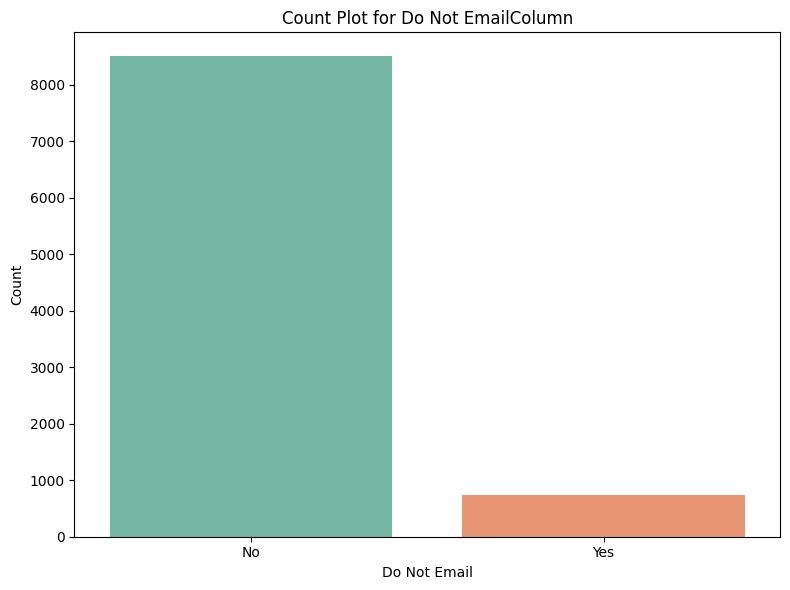

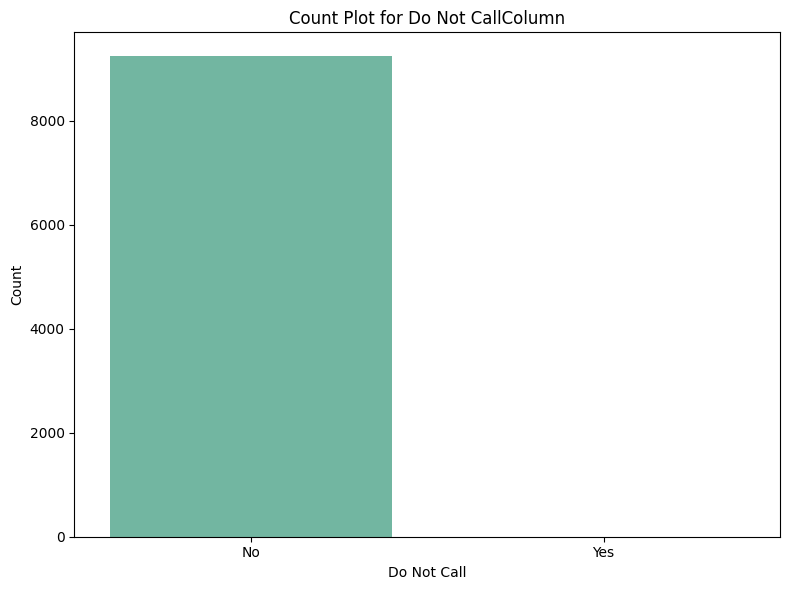

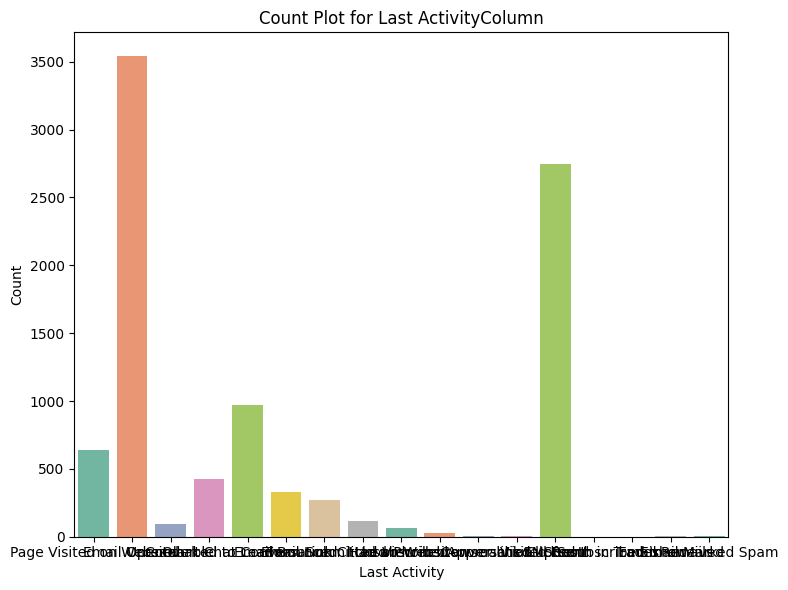

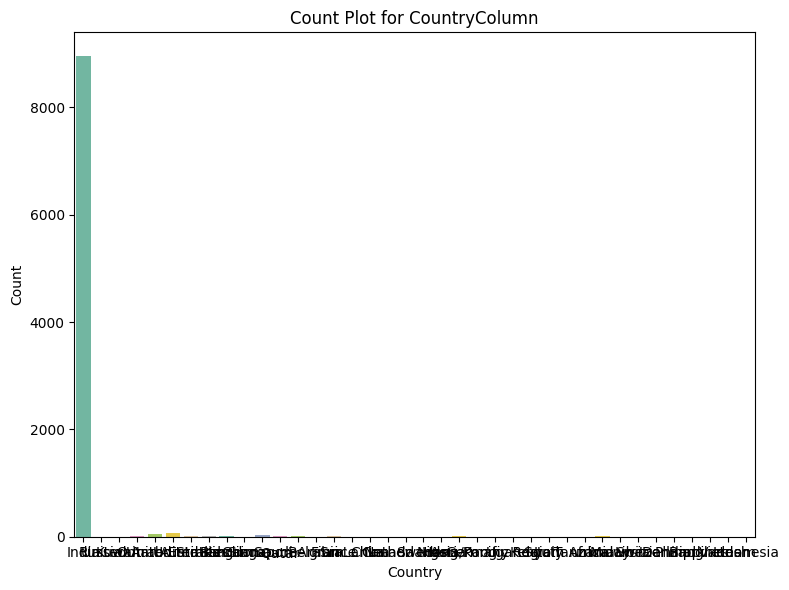

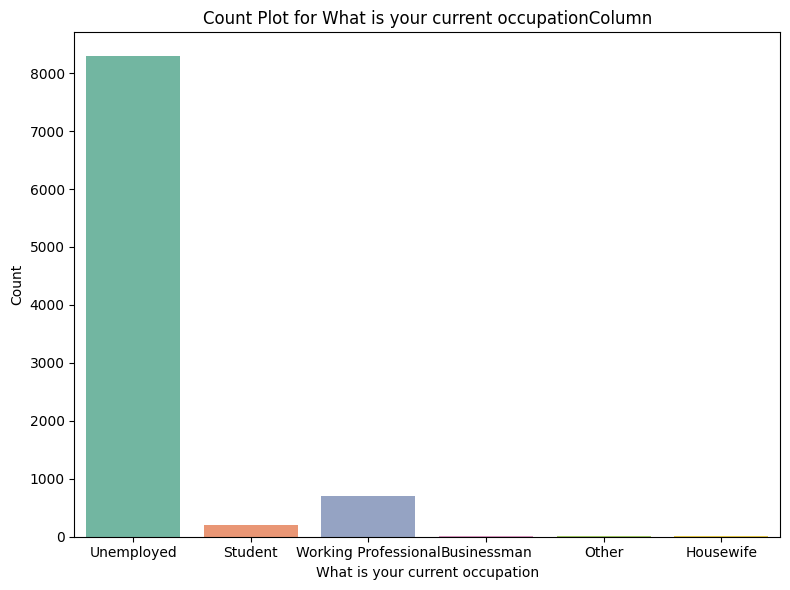

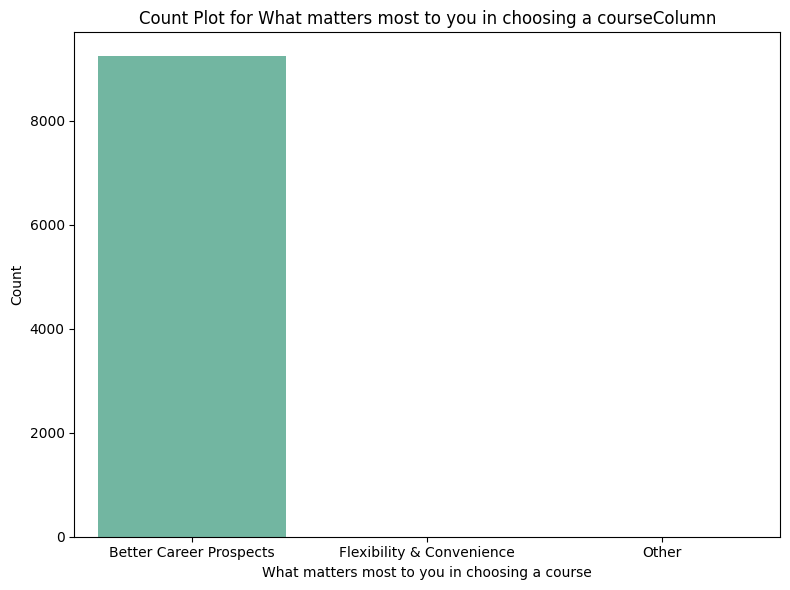

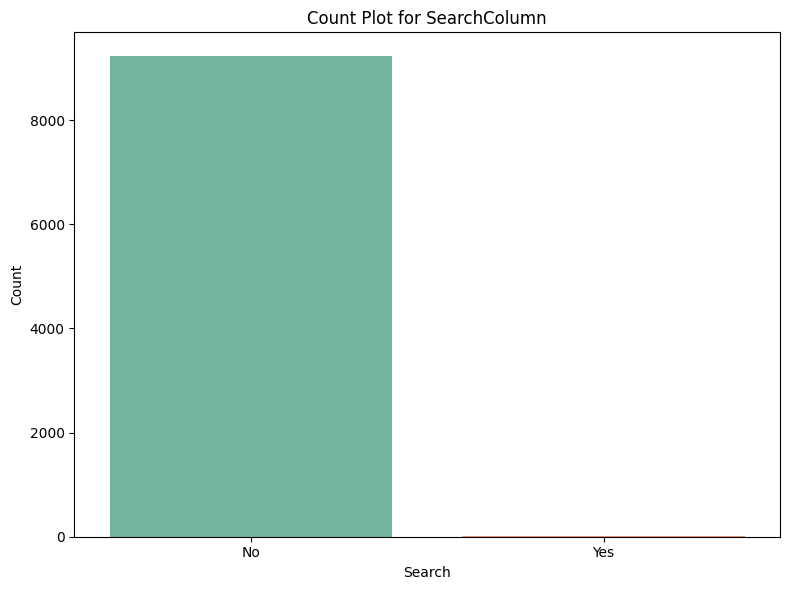

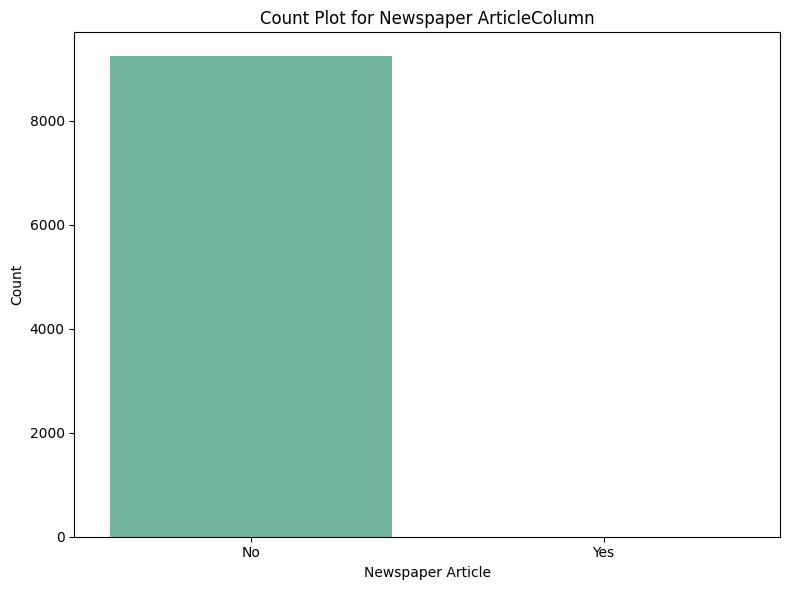

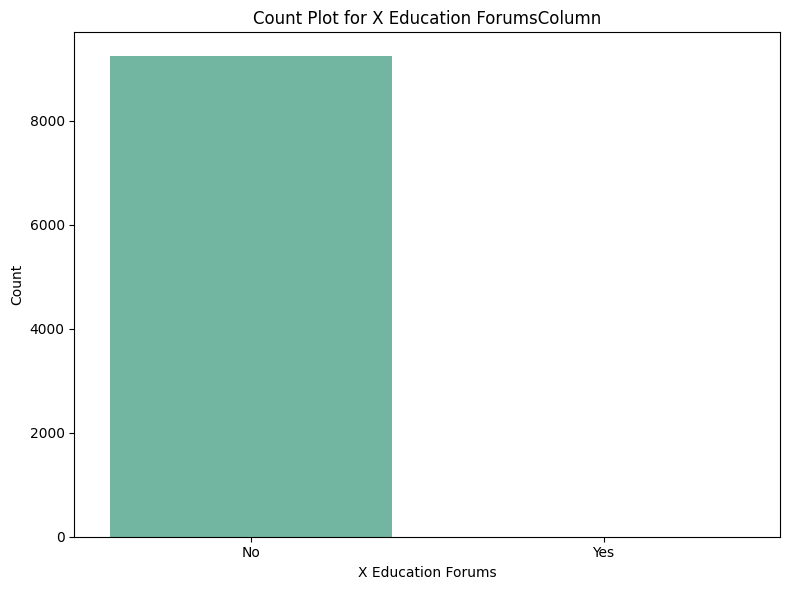

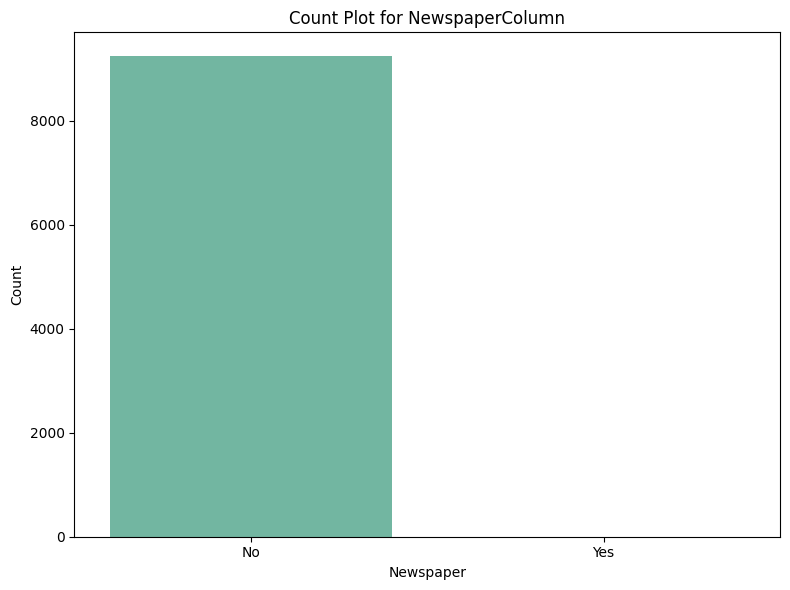

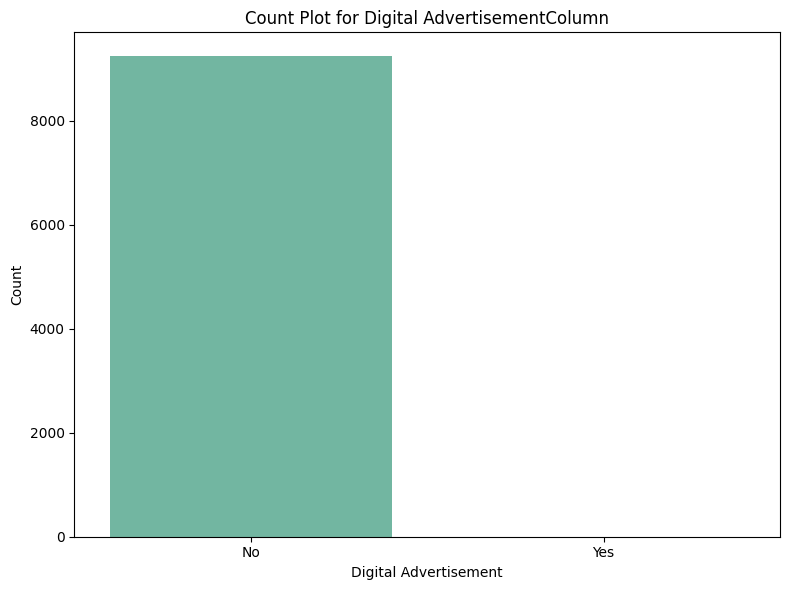

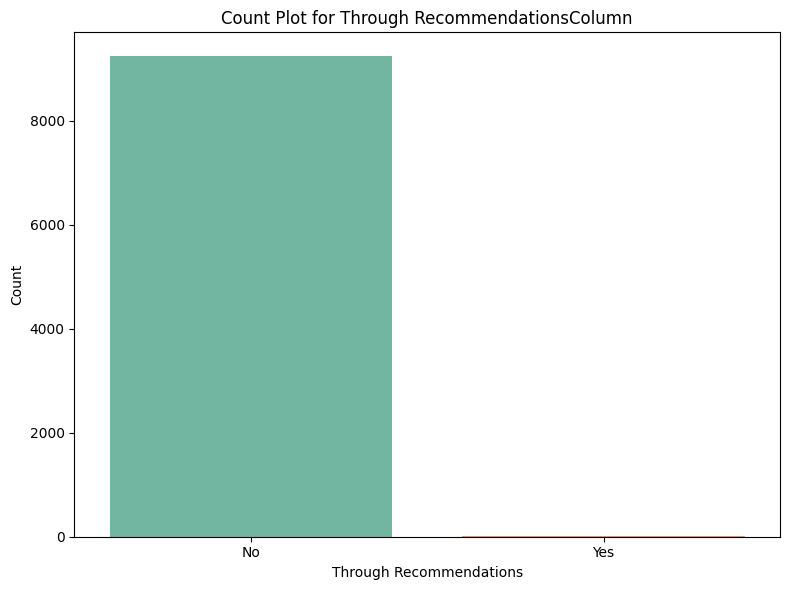

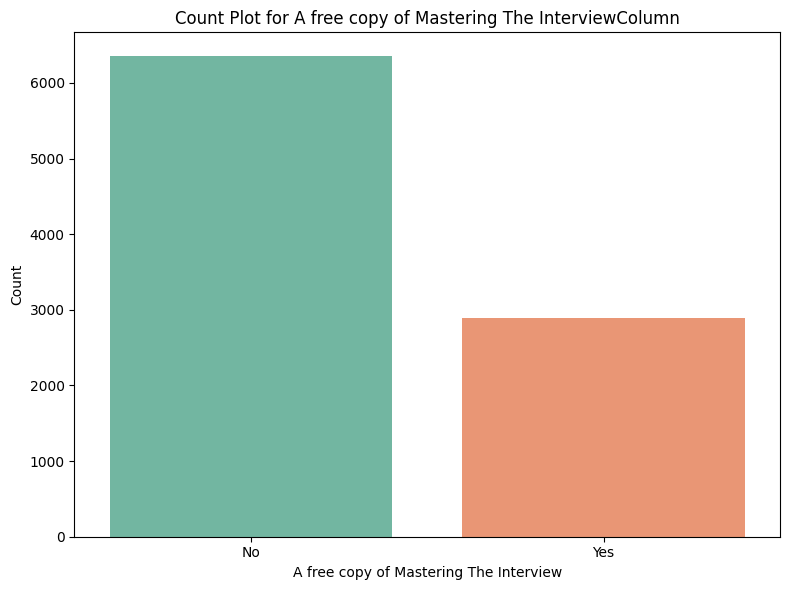

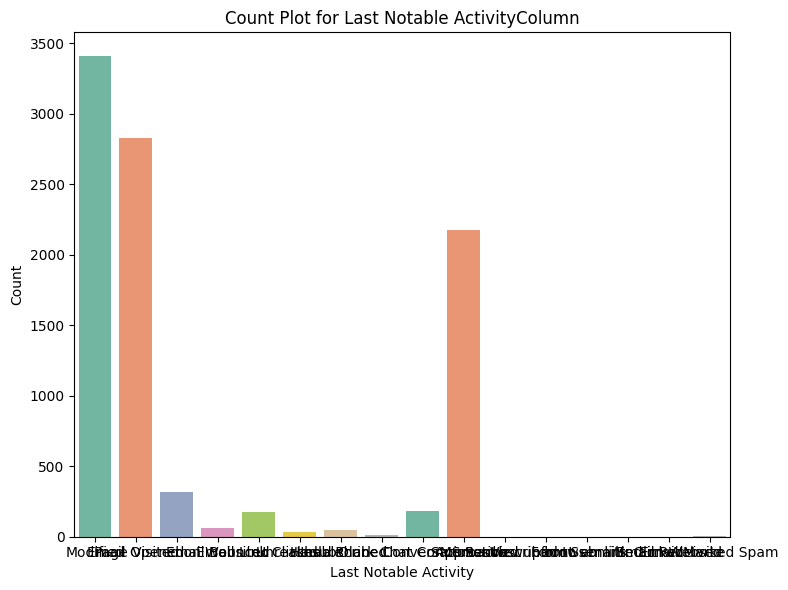

In [222]:
for col in categorical_columns:
  plt.figure(figsize=(8, 6))
  sns.countplot(x=col, data=lead, palette="Set2")
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.title('Count Plot for '+col +'Column')
  plt.tight_layout()
  plt.show()
  print("\n" + "="*170 + "\n")


Analyzing the graph reveals features like (**Do Not Call, Search, Country, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations,What matters most to you in choosing a course**) with minimal variance despite variation existing.

 This negligible impact on the model makes them less useful, prompting us to remove them for improved model efficiency and focus.


In [223]:
unusefull_Columns = ['Do Not Call', 'Search', 'Country', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations','What matters most to you in choosing a course']
lead.drop(columns = unusefull_Columns,axis=1,inplace=True)

**Revisiting the dataset once more**

In [224]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,Modified


In [225]:
lead.isnull().sum().sort_values(ascending=False)

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [226]:
lead.shape

(9240, 11)

In [227]:
lead.info(verbose=True, null_counts=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Dtype  
---  ------                                  -----  
 0   Lead Origin                             object 
 1   Lead Source                             object 
 2   Do Not Email                            object 
 3   Converted                               int64  
 4   TotalVisits                             float64
 5   Total Time Spent on Website             int64  
 6   Page Views Per Visit                    float64
 7   Last Activity                           object 
 8   What is your current occupation         object 
 9   A free copy of Mastering The Interview  object 
 10  Last Notable Activity                   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 794.2+ KB


## **Handling Outlier using "capping" technique**


Capping and winsorization offer alternative approaches to outlier handling, setting limits on extreme values instead of outright removal.

In [228]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics_col = lead.select_dtypes(include=numerics).columns
numerics_col

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')

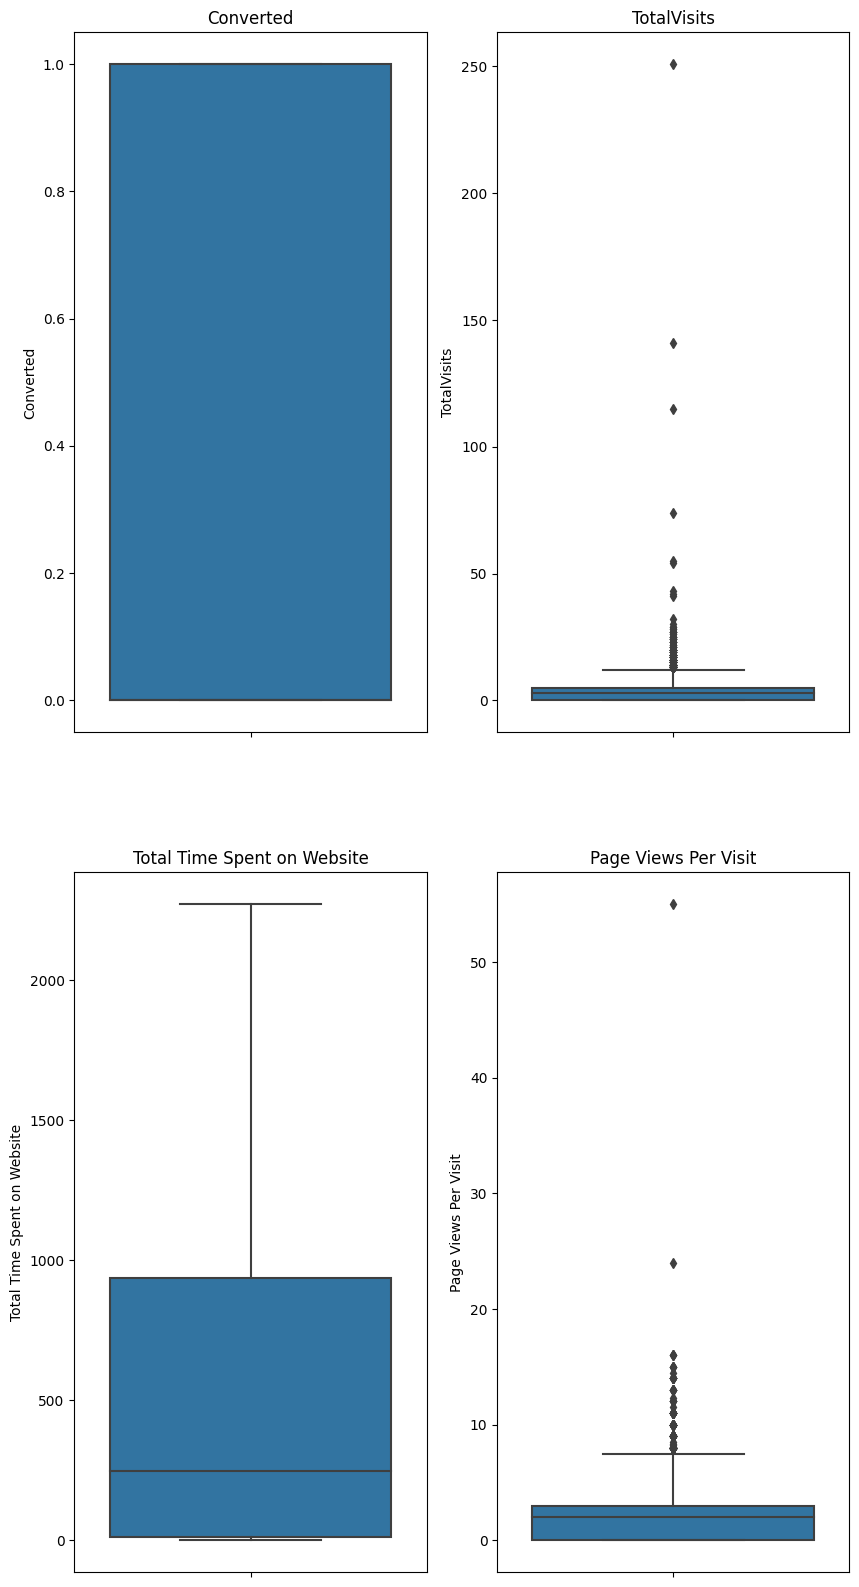

In [229]:

# Set the size of the figure and the number of rows and columns for subplots
num_rows = 2
num_cols = 2
subplot_index = 1

fig = plt.figure(figsize=(10, 20))

# Loop through columns and create box plots
for i in numerics_col:
    plt.subplot(num_rows, num_cols, subplot_index)
    plt.title('{}'.format(i))
    sns.boxplot(y=lead[i])  # Use 'x' parameter to specify the column for box plot
    subplot_index = subplot_index + 1
plt.show()

The presence of outliers in 'total visits' and 'page views per visit' raises concerns. We need  to handle these outliers, whether it be removing them, transforming the data, or using "capping" technique.

We are using "capping" technique to removing outliers.

In [230]:
lead['TotalVisits'].describe(percentiles = [0.75,0.85,0.90,0.95,0.99])

count    9240.000000
mean        3.394156
std         4.836682
min         0.000000
50%         3.000000
75%         5.000000
85%         6.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [231]:
lead['Page Views Per Visit'].describe(percentiles = [0.75,0.85,0.90,0.95,0.99])

count    9240.000000
mean        2.327787
std         2.164258
min         0.000000
50%         2.000000
75%         3.000000
85%         4.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

This operation effectively caps the values in the columns at the 90 quartile value, limiting extreme values above 90 quartile. It can be useful for handling outliers or extreme values in the data, preventing them from disproportionately affecting analysis or modeling.

In [232]:
quantile_90th=lead["TotalVisits"].quantile(0.90)
lead["TotalVisits"] =  lead.TotalVisits.apply(lambda x: quantile_90th if x>quantile_90th else x)

In [233]:
quantile_90th=lead["Page Views Per Visit"].quantile(0.90)
lead["Page Views Per Visit"] =  lead.TotalVisits.apply(lambda x: quantile_90th if x>quantile_90th else x)

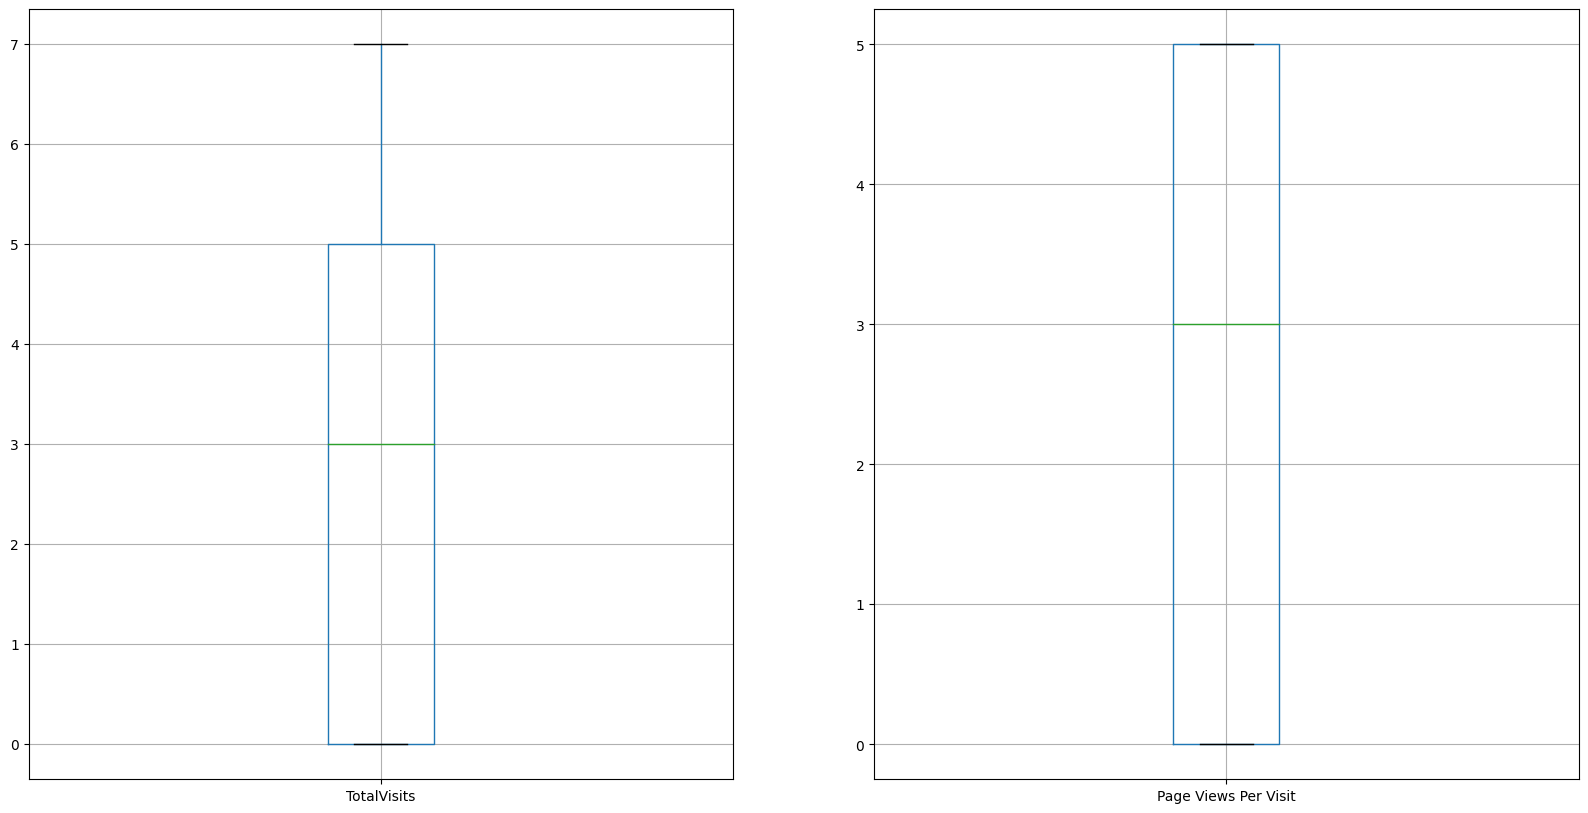

In [234]:
cols = ['TotalVisits','Page Views Per Visit']
plt.figure(figsize=(20,10))
for i, col in enumerate(cols):
    plt.subplot(1,2, i+1)
    lead.boxplot(column = col)
plt.show()

#  Data Visualization




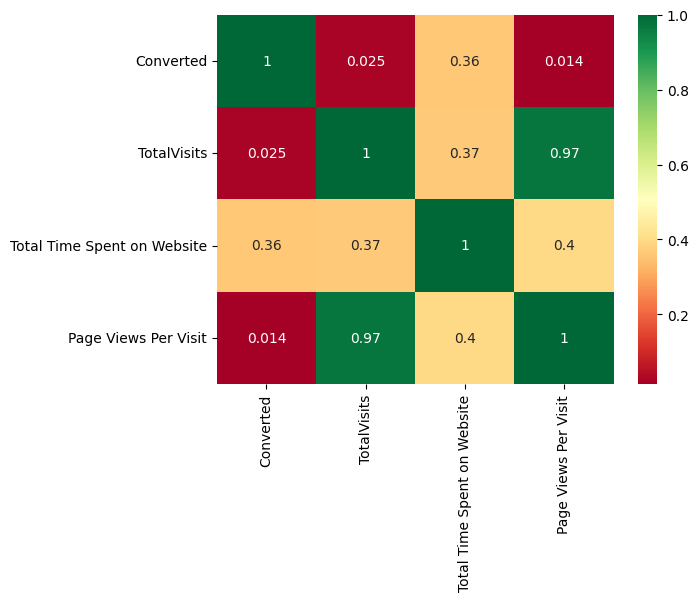

In [235]:
sns.heatmap(lead.corr(),annot=True,cmap='RdYlGn')
plt.show()

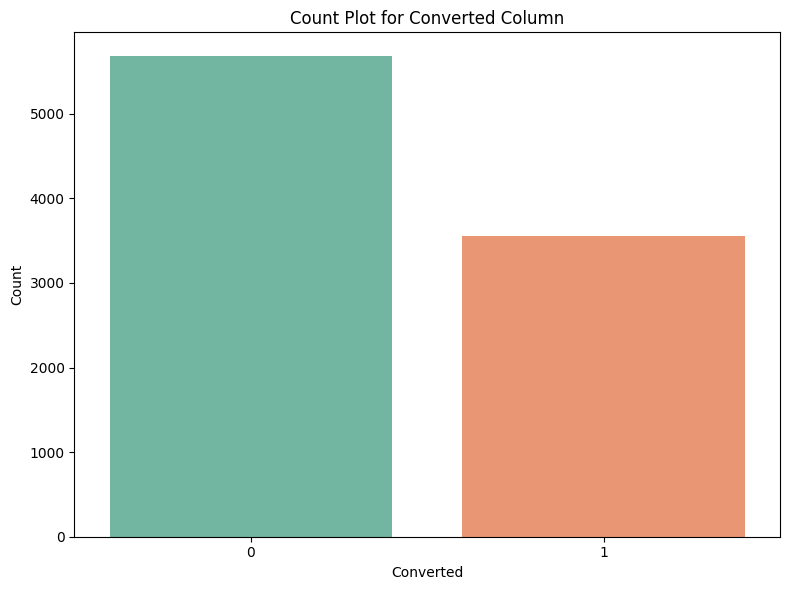

In [236]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Converted', data=lead, palette="Set2")
plt.xlabel('Converted')
plt.ylabel('Count')
plt.title('Count Plot for Converted Column')
plt.xticks(rotation=0)  # No rotation needed for binary categories (0 and 1)
plt.tight_layout()
plt.show()

In [237]:
# checking for data imbalance

lead.Converted.value_counts(normalize=True)*100

0    61.461039
1    38.538961
Name: Converted, dtype: float64

In [238]:
round(len(lead[lead.Converted==0]) / len(lead[lead.Converted==1]),2)

1.59

In [239]:
categorical_columns = lead.select_dtypes(include='object').columns
categorical_columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

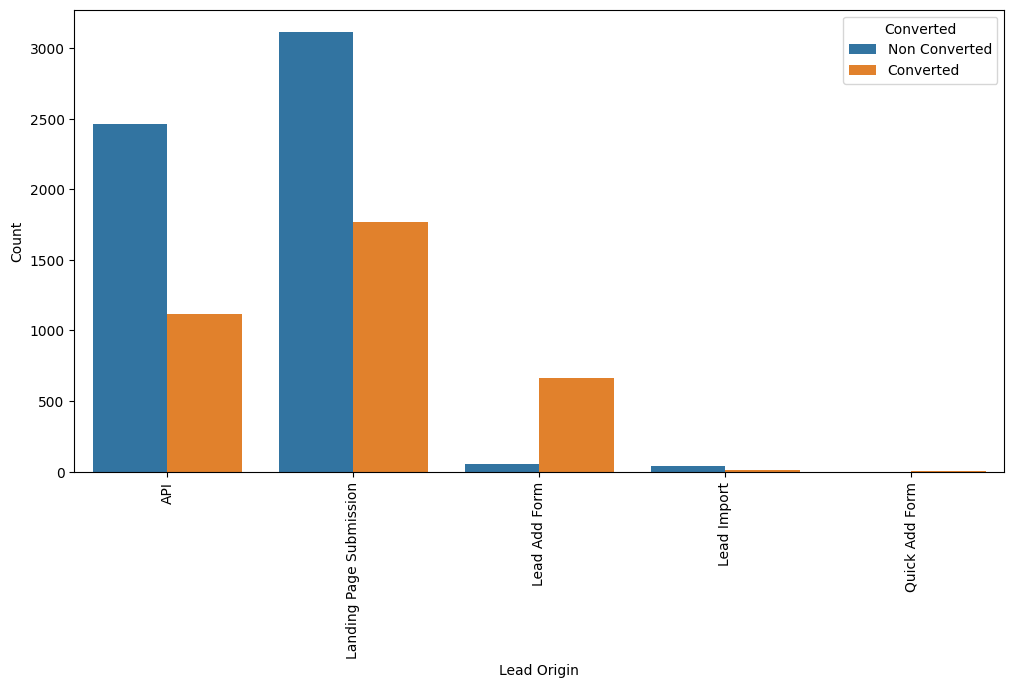

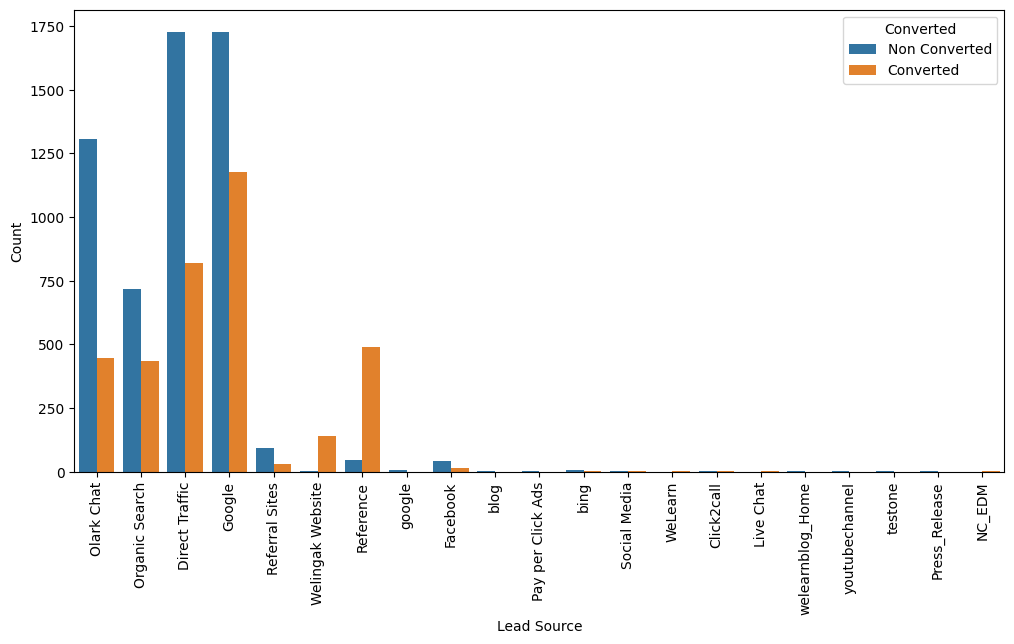

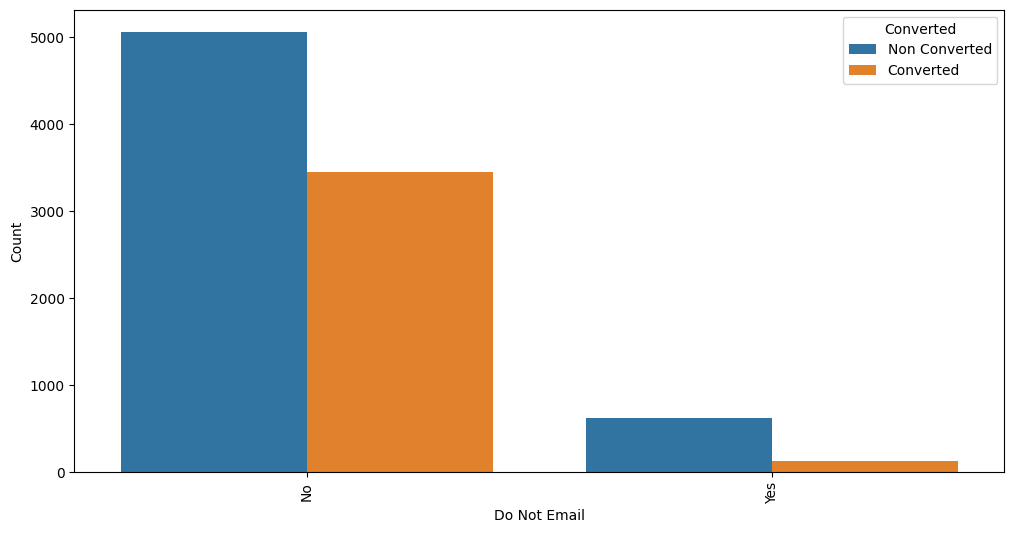

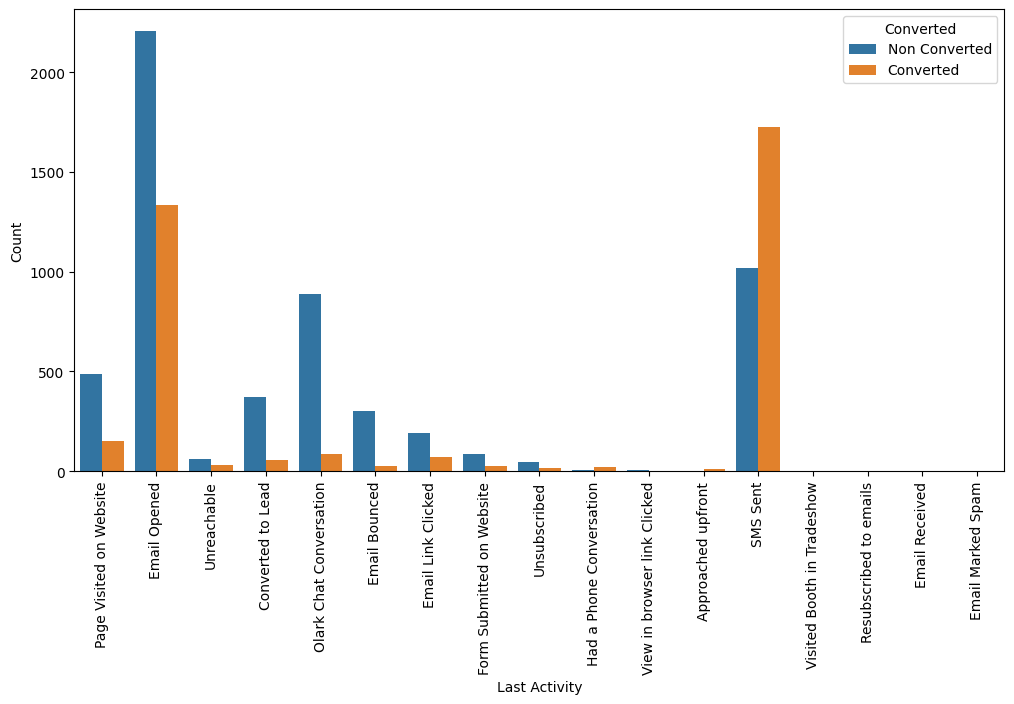

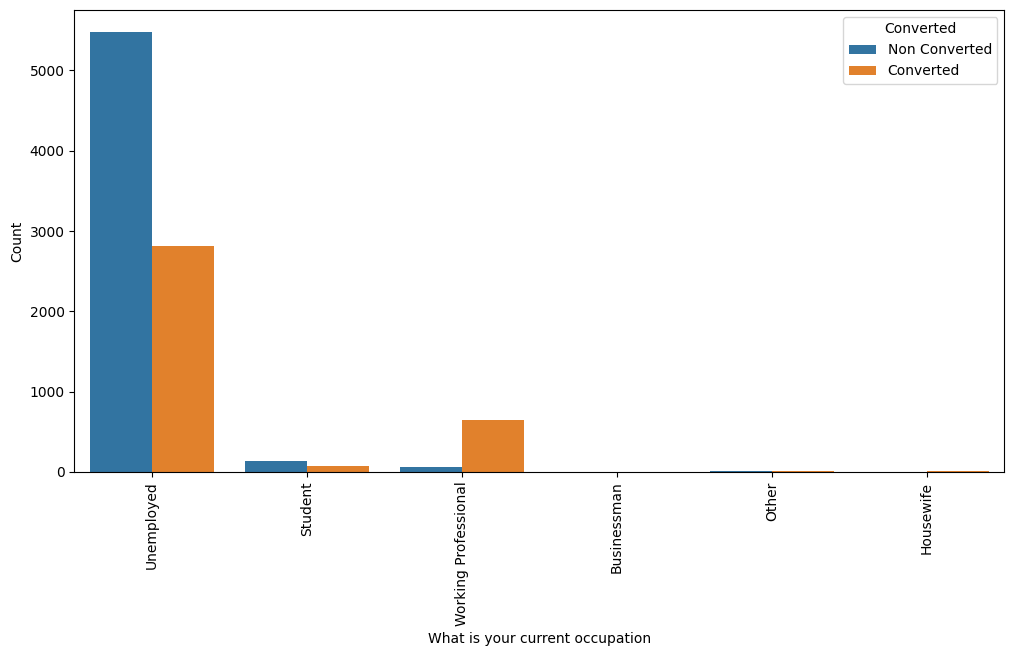

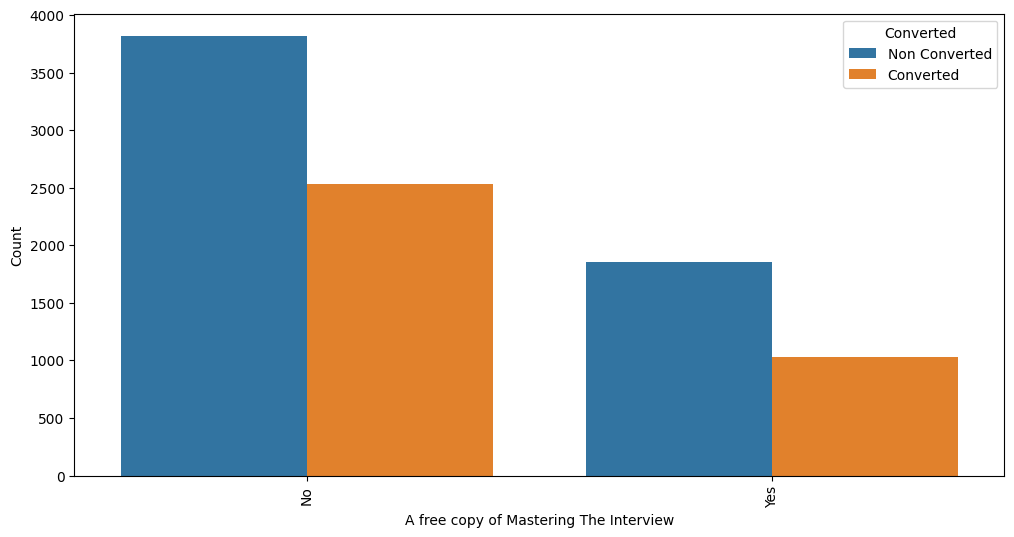

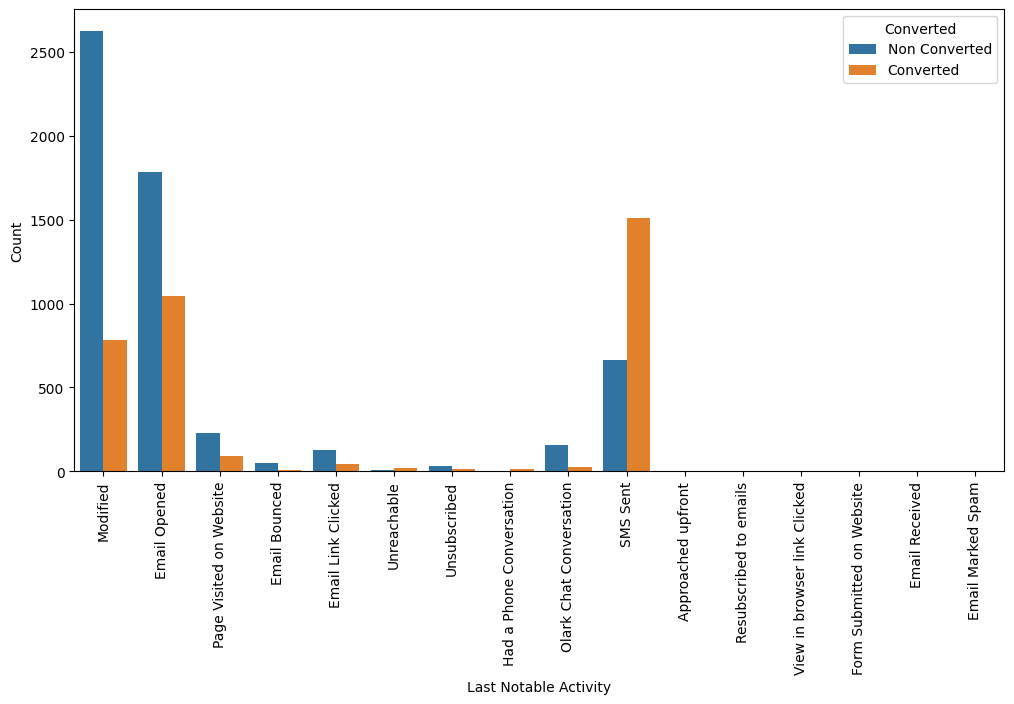

In [240]:
for col in categorical_columns:
  plt.figure(figsize=(12, 6))
  sns.countplot(x=col, hue='Converted', data=lead)
  plt.xticks(rotation=90)
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.legend(title='Converted', labels=['Non Converted', 'Converted'])
  plt.show()

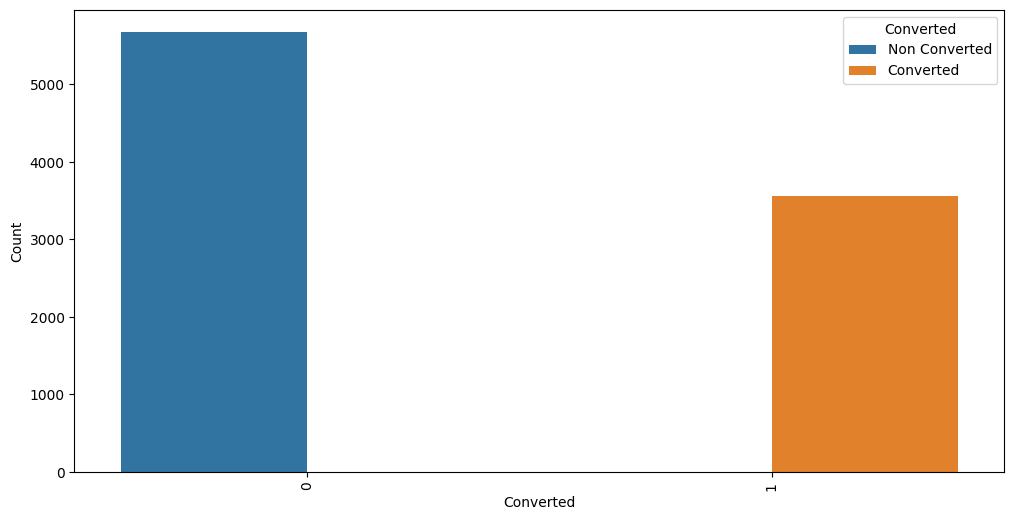

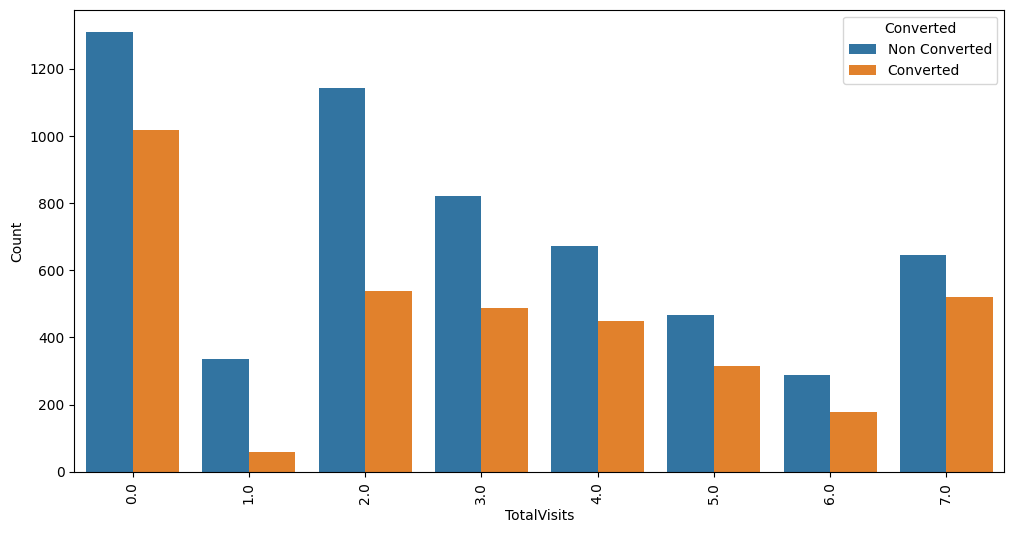

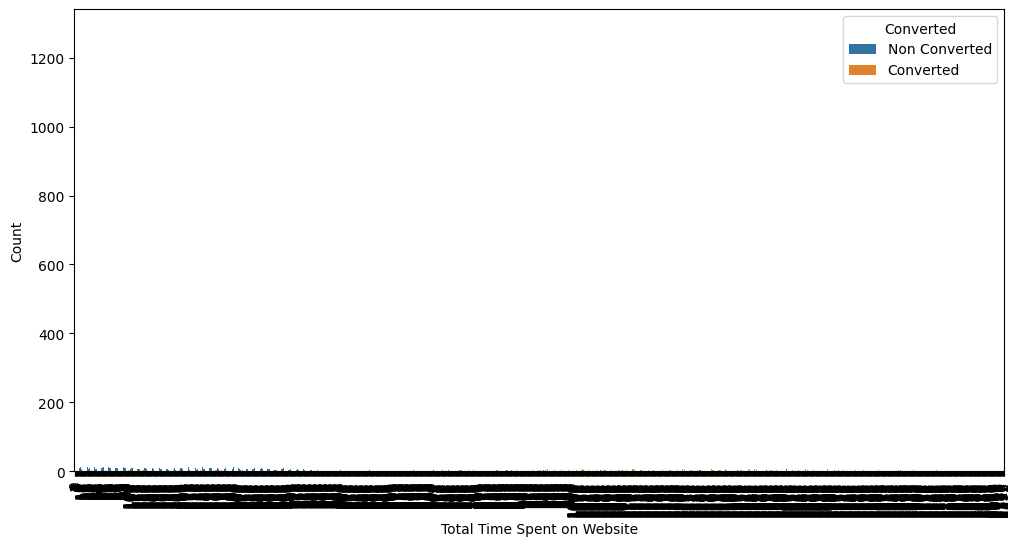

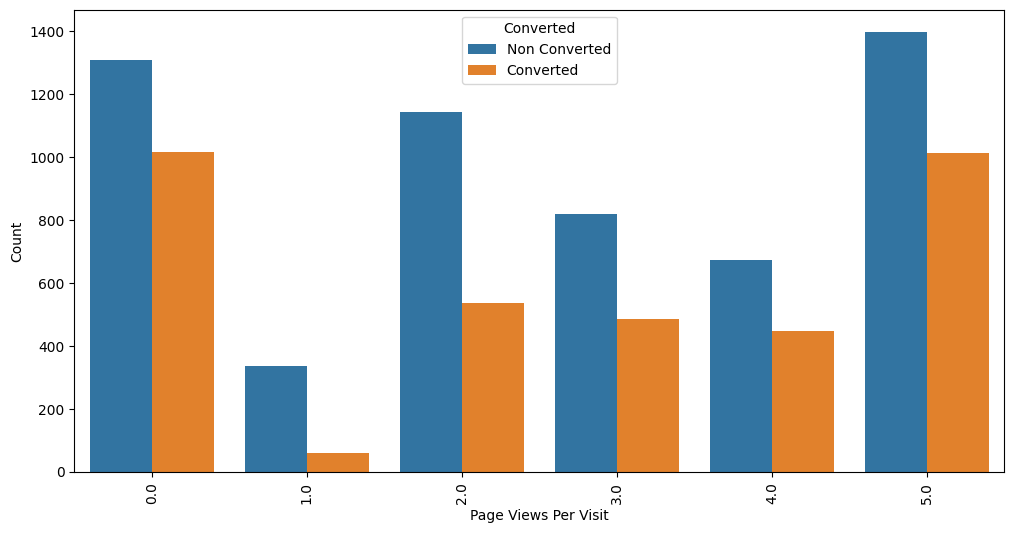

In [241]:
for col in numerics_col:
  plt.figure(figsize=(12, 6))
  sns.countplot(x=col, hue='Converted', data=lead)
  plt.xticks(rotation=90)
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.legend(title='Converted', labels=['Non Converted', 'Converted'])
  plt.show()

# Model Preparation


In [242]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,5.0,Email Opened,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,2.0,Converted to Lead,Unemployed,No,Modified


In [243]:
lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [244]:
# To convert binary variable (Yes/No) to 0/1
lead['Do Not Email'] = lead['Do Not Email'].map({'Yes': 1, 'No': 0})

In [245]:
# To convert binary variable (Yes/No) to 0/1
lead['A free copy of Mastering The Interview'] = lead['A free copy of Mastering The Interview'].map({'Yes': 1, 'No': 0})

In [246]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,Modified
1,API,Organic Search,0,0,5.0,674,5.0,Email Opened,Unemployed,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Student,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Unemployed,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,2.0,Converted to Lead,Unemployed,0,Modified


In [247]:
# Categorical variables
categorical_var = lead.columns[lead.dtypes == 'object']
categorical_var

Index(['Lead Origin', 'Lead Source', 'Last Activity',
       'What is your current occupation', 'Last Notable Activity'],
      dtype='object')

In [248]:
# To create dummy variables and drop first ones
dummy = pd.get_dummies(lead[categorical_var], drop_first=True)

# To add result to the original dataframe
df_leads = pd.concat([lead, dummy], axis=1)

# To drop the original variables
df_leads.drop(categorical_var,axis = 1,inplace = True)

In [249]:
df_leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,5.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,2.0,1428,2.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## Train-Test Split

In [250]:
# To put feature variable to X
X = df_leads.drop(['Converted'],axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,5.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,2.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [251]:
# To put response variable to y
y = df_leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [252]:
# To split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

##  Scaling Feature Variable


In [253]:
scaler = StandardScaler()
#Applying scaler to all numerical columns
num_var = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
X_train[num_var] = scaler.fit_transform(X_train[num_var])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,0,-1.241270,-0.885371,-1.373775,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,0,0.462759,0.005716,0.728698,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3516,0,0.888767,-0.691418,1.254317,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,0,0.888767,1.365219,1.254317,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3934,0,-1.241270,-0.885371,-1.373775,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [254]:
# To check the conversion rate
conversion = (sum(df_leads['Converted'])/len(df_leads['Converted'].index))*100
conversion

38.53896103896104

We have almost 39% conversion rate

##  Model Building

In [255]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6407
Model Family:                Binomial   Df Model:                           60
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 18 Dec 2023   Deviance:                   1.5750e+05
Time:                        13:48:20   Pearson chi2:                 7.70e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 2.939e+15   5.24e+07   5.61e+07      0.000    2.94e+15    2.94e+15
Do Not Email                                         -4.655e+14   4.42e+06  -1.05e+08      0.000   -4.66e+14   -4.66e+14
TotalVisits                                          -1.165e+14   3.78e+06  -3.08e+07      0.000   -1.16e+14   -1.16e+14
Total Time Spent on Website                           1.952e+14    9.5e+05   2.05e+08      0.000    1.95e+14    1.95e+14
Page Views Per Visit                                  1.822e+13   4.31e+06   4.23e+06      0.000    1.82e+13    1.82e+13
A free copy of Mastering The Interview                4.674e+13    2.6e+06    1.8e+07      0.000    4.67e+13    4.67e+13
Lead Origin_Landing Page Submission                  -1.722e+14   2.65e+06  -6.49e+07      0.000   -1.72e+14   -1.72e+14
Lead Origin_Lead Add Form                             4.882e+14   1.31e+07   3.71e+07      0.000    4.88e+14    4.88e+14
Lead Origin_Lead Import                               2.639e+14   4.81e+07   5.49e+06      0.000    2.64e+14    2.64e+14
Lead Origin_Quick Add Form                            5.339e+15   6.74e+07   7.92e+07      0.000    5.34e+15    5.34e+15
Lead Source_Direct Traffic                           -1.485e+15   4.09e+07  -3.63e+07      0.000   -1.49e+15   -1.49e+15
Lead Source_Facebook                                 -1.869e+15    6.3e+07  -2.97e+07      0.000   -1.87e+15   -1.87e+15
Lead Source_Google                                   -1.618e+15   4.08e+07  -3.96e+07      0.000   -1.62e+15   -1.62e+15
Lead Source_Live Chat                                 2.005e+15   6.13e+07   3.27e+07      0.000       2e+15       2e+15
Lead Source_NC_EDM                                    3.668e+15   7.86e+07   4.66e+07      0.000    3.67e+15    3.67e+15
Lead Source_Olark Chat                               -5.882e+14    4.1e+07  -1.43e+07      0.000   -5.88e+14   -5.88e+14
Lead Source_Organic Search                           -1.335e+15    4.1e+07  -3.26e+07      0.000   -1.34e+15   -1.34e+15
Lead Source_Pay per Click Ads                        -5.191e+15   7.86e+07  -6.61e+07      0.000   -5.19e+15   -5.19e+15
Lead Source_Press_Release                            -4.626e+15    6.3e+07  -7.34e+07      0.000   -4.63e+15   -4.63e+15
Lead Source_Reference                                -1.035e+15   3.89e+07  -2.66e+07      0.000   -1.04e+15   -1.04e+15
Lead Source_Referral Sites                           -1.447e+15   4.15e+07  -3.49e+07      0.000   -1.45e+15   -1.45e+15
Lead Source_Social Media                             -4.947e+14   6.27e+07  -7.89e+06      0.000   -4.95e+14   -4.95e+14
Lead Source_WeLearn                                   3.36

Feature Selection Using RFE

In [256]:
logreg = LogisticRegression()


In [257]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, step = 15)
rfe = rfe.fit(X_train, y_train)

In [258]:
# To check output of RFE
rfe.support_

array([ True, False,  True, False, False, False,  True, False, False,
        True, False, False, False, False,  True,  True, False, False,
        True, False,  True, False,  True, False, False,  True, False,
       False, False,  True,  True,  True, False, False, False, False,
        True,  True,  True,  True,  True,  True, False, False, False,
        True,  True,  True,  True,  True, False,  True, False,  True,
       False, False,  True,  True,  True,  True,  True, False,  True,
       False, False])

In [259]:
# Features selected
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('A free copy of Mastering The Interview', False, 4),
 ('Lead Origin_Landing Page Submission', False, 3),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 4),
 ('Lead Origin_Quick Add Form', False, 3),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 2),
 ('Lead Source_Google', False, 3),
 ('Lead Source_Live Chat', False, 4),
 ('Lead Source_NC_EDM', False, 3),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 4),
 ('Lead Source_Press_Release', False, 3),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 2),
 ('Lead Source_Social Media', True, 1),
 ('Lead Source_WeLearn', False, 3),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 4),
 ('Lead Source_blog', False, 3),
 ('Lead Sour

In [260]:
# Feature columns selected by RFE
columns = X_train.columns[rfe.support_]
columns

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Social Media',
       'Lead Source_Welingak Website', 'Lead Source_google',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'L

In [261]:
# Features eliminated
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Referral Sites', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website', 'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Marked Spam',
       'Last Notable Activity_Email 

In [262]:
# Adding constant
X_train_sm = sm.add_constant(X_train[columns])

# Running sm.GLM
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6436
Model Family:                Binomial   Df Model:                           31
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2659.4
Date:                Mon, 18 Dec 2023   Deviance:                       5318.9
Time:                        13:48:21   Pearson chi2:                 7.38e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3977
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0738      1.180      0.063      0.950      -2.239       2.386
Do Not Email                                            -1.1401      0.196     -5.821      0.000      -1.524      -0.756
Total Time Spent on Website                              1.0933      0.040     27.580      0.000       1.016       1.171
Lead Origin_Lead Add Form                                2.9878      0.487      6.131      0.000       2.033       3.943
Lead Source_Direct Traffic                              -0.3927      0.088     -4.471      0.000      -0.565      -0.221
Lead Source_Olark Chat                                   0.9632      0.110      8.763      0.000       0.748       1.179
Lead Source_Organic Search                              -0.1644      0.112     -1.462      0.144      -0.385       0.056
Lead Source_Reference                                    0.5783      0.519      1.114      0.265      -0.439       1.596
Lead Source_Social Media                                 2.2276      1.456      1.530      0.126      -0.625       5.080
Lead Source_Welingak Website                             2.4630      0.866      2.844      0.004       0.766       4.160
Lead Source_google                                     -21.7166   3.36e+04     -0.001      0.999   -6.58e+04    6.58e+04
Last Activity_Converted to Lead                         -0.9660      0.241     -4.007      0.000      -1.439      -0.493
Last Activity_Email Bounced                             -1.0088      0.356     -2.830      0.005      -1.707      -0.310
Last Activity_Email Link Clicked                        -0.4255      0.393     -1.084      0.279      -1.195       0.344
Last Activity_Had a Phone Conversation                   0.6684      0.961      0.695      0.487      -1.216       2.553
Last Activity_Olark Chat Conversation                   -1.2170      0.211     -5.781      0.000      -1.630      -0.804
Last Activity_Page Visited on Website                   -0.5337      0.240     -2.224      0.026      -1.004      -0.063
Last Activity_Resubscribed to emails                    11.8823   3.97e+04      0.000      1.000   -7.79e+04    7.79e+04
Last Activity_SMS Sent                                   0.4511      0.160      2.824      0.005       0.138       0.764
Last Activity_Unreachable                               -0.9814      0.669     -1.467      0.142      -2.293       0.330
What is your current occupation_Housewife               23.6506   2.27e+04      0.001      0.999   -4.45e+04    4.45e+04
What is your current occupation_Other                    0.1462      1.421      0.103      0.918      -2.640       2.932
What is your current occupation_Student                  0

In [263]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[columns].columns
vif['VIF'] = [variance_inflation_factor(X_train[columns].values, i) for i in range(X_train[columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,Last Activity_Resubscribed to emails,inf
30,Last Notable Activity_Resubscribed to emails,inf
22,What is your current occupation_Unemployed,24.85
2,Lead Origin_Lead Add Form,15.97
6,Lead Source_Reference,12.98
25,Last Notable Activity_Email Opened,8.79
17,Last Activity_SMS Sent,6.78
27,Last Notable Activity_Modified,6.13
8,Lead Source_Welingak Website,3.77
24,Last Notable Activity_Email Link Clicked,3.18


In [264]:
col = columns.drop('Last Activity_Resubscribed to emails', 1)


In [265]:
# Adding constant
X_train_sm = sm.add_constant(X_train[col])

# Running sm.GLM
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6436
Model Family:                Binomial   Df Model:                           31
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2659.4
Date:                Mon, 18 Dec 2023   Deviance:                       5318.9
Time:                        13:48:24   Pearson chi2:                 7.38e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3977
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0738      1.180      0.063      0.950      -2.239       2.386
Do Not Email                                            -1.1401      0.196     -5.821      0.000      -1.524      -0.756
Total Time Spent on Website                              1.0933      0.040     27.580      0.000       1.016       1.171
Lead Origin_Lead Add Form                                2.9878      0.487      6.131      0.000       2.033       3.943
Lead Source_Direct Traffic                              -0.3927      0.088     -4.471      0.000      -0.565      -0.221
Lead Source_Olark Chat                                   0.9632      0.110      8.763      0.000       0.748       1.179
Lead Source_Organic Search                              -0.1644      0.112     -1.462      0.144      -0.385       0.056
Lead Source_Reference                                    0.5783      0.519      1.114      0.265      -0.439       1.596
Lead Source_Social Media                                 2.2276      1.456      1.530      0.126      -0.625       5.080
Lead Source_Welingak Website                             2.4630      0.866      2.844      0.004       0.766       4.160
Lead Source_google                                     -21.7166   3.36e+04     -0.001      0.999   -6.58e+04    6.58e+04
Last Activity_Converted to Lead                         -0.9660      0.241     -4.007      0.000      -1.439      -0.493
Last Activity_Email Bounced                             -1.0088      0.356     -2.830      0.005      -1.707      -0.310
Last Activity_Email Link Clicked                        -0.4255      0.393     -1.084      0.279      -1.195       0.344
Last Activity_Had a Phone Conversation                   0.6684      0.961      0.695      0.487      -1.216       2.553
Last Activity_Olark Chat Conversation                   -1.2170      0.211     -5.781      0.000      -1.630      -0.804
Last Activity_Page Visited on Website                   -0.5337      0.240     -2.224      0.026      -1.004      -0.063
Last Activity_SMS Sent                                   0.4511      0.160      2.824      0.005       0.138       0.764
Last Activity_Unreachable                               -0.9814      0.669     -1.467      0.142      -2.293       0.330
What is your current occupation_Housewife               23.6506   2.27e+04      0.001      0.999   -4.45e+04    4.45e+04
What is your current occupation_Other                    0.1462      1.421      0.103      0.918      -2.640       2.932
What is your current occupation_Student                  0.1309      1.193      0.110      0.913      -2.208       2.470
What is your current occupation_Unemployed              -0

In [266]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
21,What is your current occupation_Unemployed,24.85
2,Lead Origin_Lead Add Form,15.97
6,Lead Source_Reference,12.98
24,Last Notable Activity_Email Opened,8.79
16,Last Activity_SMS Sent,6.78
26,Last Notable Activity_Modified,6.13
8,Lead Source_Welingak Website,3.77
23,Last Notable Activity_Email Link Clicked,3.18
12,Last Activity_Email Link Clicked,3.17
22,What is your current occupation_Working Profes...,3.06


In [267]:
col = col.drop('What is your current occupation_Unemployed', 1)


In [268]:
# Adding constant
X_train_sm = sm.add_constant(X_train[col])

# Running sm.GLM
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6437
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2659.5
Date:                Mon, 18 Dec 2023   Deviance:                       5318.9
Time:                        13:48:26   Pearson chi2:                 7.38e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3977
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1928      0.176     -1.093      0.274      -0.539       0.153
Do Not Email                                            -1.1404      0.196     -5.822      0.000      -1.524      -0.757
Total Time Spent on Website                              1.0934      0.040     27.585      0.000       1.016       1.171
Lead Origin_Lead Add Form                                2.9878      0.487      6.131      0.000       2.033       3.943
Lead Source_Direct Traffic                              -0.3925      0.088     -4.469      0.000      -0.565      -0.220
Lead Source_Olark Chat                                   0.9633      0.110      8.764      0.000       0.748       1.179
Lead Source_Organic Search                              -0.1639      0.112     -1.457      0.145      -0.384       0.057
Lead Source_Reference                                    0.5799      0.519      1.117      0.264      -0.438       1.598
Lead Source_Social Media                                 2.2275      1.456      1.530      0.126      -0.625       5.080
Lead Source_Welingak Website                             2.4630      0.866      2.844      0.004       0.766       4.160
Lead Source_google                                     -21.7164   3.36e+04     -0.001      0.999   -6.58e+04    6.58e+04
Last Activity_Converted to Lead                         -0.9671      0.241     -4.012      0.000      -1.440      -0.495
Last Activity_Email Bounced                             -1.0096      0.356     -2.833      0.005      -1.708      -0.311
Last Activity_Email Link Clicked                        -0.4266      0.393     -1.086      0.277      -1.196       0.343
Last Activity_Had a Phone Conversation                   0.6670      0.961      0.694      0.488      -1.217       2.551
Last Activity_Olark Chat Conversation                   -1.2175      0.210     -5.784      0.000      -1.630      -0.805
Last Activity_Page Visited on Website                   -0.5348      0.240     -2.229      0.026      -1.005      -0.064
Last Activity_SMS Sent                                   0.4501      0.160      2.818      0.005       0.137       0.763
Last Activity_Unreachable                               -0.9826      0.669     -1.469      0.142      -2.294       0.329
What is your current occupation_Housewife               23.9174   2.27e+04      0.001      0.999   -4.45e+04    4.45e+04
What is your current occupation_Other                    0.4135      0.808      0.512      0.609      -1.170       1.997
What is your current occupation_Student                  0.3981      0.238      1.674      0.094      -0.068       0.864
What is your current occupation_Working Professional     2

In [269]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,15.89
6,Lead Source_Reference,12.98
8,Lead Source_Welingak Website,3.77
12,Last Activity_Email Link Clicked,3.07
22,Last Notable Activity_Email Link Clicked,3.02
25,Last Notable Activity_Modified,2.77
15,Last Activity_Page Visited on Website,2.59
27,Last Notable Activity_Page Visited on Website,2.29
14,Last Activity_Olark Chat Conversation,2.24
13,Last Activity_Had a Phone Conversation,2.04


In [270]:
col = col.drop('Lead Origin_Lead Add Form', 1)


In [271]:
# Adding constant
X_train_sm = sm.add_constant(X_train[col])

# Running sm.GLM
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6438
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2684.2
Date:                Mon, 18 Dec 2023   Deviance:                       5368.5
Time:                        13:48:27   Pearson chi2:                 7.31e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3931
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1051      0.175     -0.601      0.548      -0.447       0.237
Do Not Email                                            -1.0539      0.192     -5.485      0.000      -1.431      -0.677
Total Time Spent on Website                              1.0683      0.039     27.295      0.000       0.992       1.145
Lead Source_Direct Traffic                              -0.4470      0.087     -5.134      0.000      -0.618      -0.276
Lead Source_Olark Chat                                   0.8890      0.108      8.198      0.000       0.676       1.102
Lead Source_Organic Search                              -0.2182      0.112     -1.953      0.051      -0.437       0.001
Lead Source_Reference                                    3.4832      0.207     16.797      0.000       3.077       3.890
Lead Source_Social Media                                 2.1832      1.453      1.503      0.133      -0.664       5.030
Lead Source_Welingak Website                             5.3558      0.724      7.394      0.000       3.936       6.776
Lead Source_google                                     -21.7585   3.37e+04     -0.001      0.999   -6.61e+04     6.6e+04
Last Activity_Converted to Lead                         -0.9921      0.240     -4.138      0.000      -1.462      -0.522
Last Activity_Email Bounced                             -0.9784      0.351     -2.787      0.005      -1.667      -0.290
Last Activity_Email Link Clicked                        -0.4612      0.391     -1.180      0.238      -1.228       0.305
Last Activity_Had a Phone Conversation                   0.6567      0.955      0.687      0.492      -1.216       2.529
Last Activity_Olark Chat Conversation                   -1.2444      0.210     -5.934      0.000      -1.655      -0.833
Last Activity_Page Visited on Website                   -0.5587      0.237     -2.353      0.019      -1.024      -0.093
Last Activity_SMS Sent                                   0.4368      0.159      2.755      0.006       0.126       0.748
Last Activity_Unreachable                               -1.0323      0.666     -1.549      0.121      -2.338       0.274
What is your current occupation_Housewife               23.8989   2.28e+04      0.001      0.999   -4.46e+04    4.46e+04
What is your current occupation_Other                    0.4277      0.808      0.530      0.596      -1.155       2.010
What is your current occupation_Student                  0.4131      0.235      1.756      0.079      -0.048       0.874
What is your current occupation_Working Professional     2.7943      0.189     14.788      0.000       2.424       3.165
Last Notable Activity_Email Link Clicked                -1

In [272]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Last Activity_Email Link Clicked,3.07
21,Last Notable Activity_Email Link Clicked,3.02
24,Last Notable Activity_Modified,2.77
14,Last Activity_Page Visited on Website,2.59
26,Last Notable Activity_Page Visited on Website,2.29
13,Last Activity_Olark Chat Conversation,2.24
12,Last Activity_Had a Phone Conversation,2.04
23,Last Notable Activity_Had a Phone Conversation,2.02
3,Lead Source_Olark Chat,1.98
10,Last Activity_Email Bounced,1.95


In [273]:
col = col.drop('Last Notable Activity_Resubscribed to emails', 1)


In [274]:
# Adding constant
X_train_sm = sm.add_constant(X_train[col])

# Running sm.GLM
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6439
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2685.0
Date:                Mon, 18 Dec 2023   Deviance:                       5370.0
Time:                        13:48:28   Pearson chi2:                 7.32e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3929
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0907      0.174     -0.521      0.603      -0.432       0.251
Do Not Email                                            -1.0566      0.192     -5.498      0.000      -1.433      -0.680
Total Time Spent on Website                              1.0683      0.039     27.291      0.000       0.992       1.145
Lead Source_Direct Traffic                              -0.4470      0.087     -5.134      0.000      -0.618      -0.276
Lead Source_Olark Chat                                   0.8923      0.108      8.233      0.000       0.680       1.105
Lead Source_Organic Search                              -0.2180      0.112     -1.952      0.051      -0.437       0.001
Lead Source_Reference                                    3.4833      0.207     16.797      0.000       3.077       3.890
Lead Source_Social Media                                 2.1843      1.452      1.504      0.133      -0.662       5.031
Lead Source_Welingak Website                             5.3566      0.724      7.395      0.000       3.937       6.776
Lead Source_google                                     -20.7573   2.04e+04     -0.001      0.999   -4.01e+04       4e+04
Last Activity_Converted to Lead                         -0.9974      0.240     -4.162      0.000      -1.467      -0.528
Last Activity_Email Bounced                             -0.9851      0.351     -2.806      0.005      -1.673      -0.297
Last Activity_Email Link Clicked                        -0.4676      0.391     -1.196      0.232      -1.234       0.299
Last Activity_Had a Phone Conversation                   0.6515      0.955      0.682      0.495      -1.221       2.524
Last Activity_Olark Chat Conversation                   -1.2520      0.210     -5.975      0.000      -1.663      -0.841
Last Activity_Page Visited on Website                   -0.5640      0.237     -2.376      0.017      -1.029      -0.099
Last Activity_SMS Sent                                   0.4239      0.158      2.681      0.007       0.114       0.734
Last Activity_Unreachable                               -1.0375      0.666     -1.557      0.119      -2.344       0.269
What is your current occupation_Housewife               22.8976   1.38e+04      0.002      0.999    -2.7e+04    2.71e+04
What is your current occupation_Other                    0.4287      0.808      0.531      0.596      -1.154       2.011
What is your current occupation_Student                  0.4123      0.235      1.752      0.080      -0.049       0.873
What is your current occupation_Working Professional     2.7937      0.189     14.784      0.000       2.423       3.164
Last Notable Activity_Email Link Clicked                -1

In [275]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Last Activity_Email Link Clicked,3.07
21,Last Notable Activity_Email Link Clicked,3.02
24,Last Notable Activity_Modified,2.77
14,Last Activity_Page Visited on Website,2.59
26,Last Notable Activity_Page Visited on Website,2.29
13,Last Activity_Olark Chat Conversation,2.24
12,Last Activity_Had a Phone Conversation,2.04
23,Last Notable Activity_Had a Phone Conversation,2.02
3,Lead Source_Olark Chat,1.97
10,Last Activity_Email Bounced,1.95


In [276]:
col = col.drop('What is your current occupation_Housewife', 1)


In [277]:
# Adding constant
X_train_sm = sm.add_constant(X_train[col])

# Running sm.GLM
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6440
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2692.0
Date:                Mon, 18 Dec 2023   Deviance:                       5384.0
Time:                        13:48:29   Pearson chi2:                 7.35e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3916
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0700      0.174     -0.403      0.687      -0.410       0.270
Do Not Email                                            -1.0611      0.192     -5.521      0.000      -1.438      -0.684
Total Time Spent on Website                              1.0673      0.039     27.296      0.000       0.991       1.144
Lead Source_Direct Traffic                              -0.4483      0.087     -5.156      0.000      -0.619      -0.278
Lead Source_Olark Chat                                   0.8854      0.108      8.180      0.000       0.673       1.098
Lead Source_Organic Search                              -0.2137      0.112     -1.917      0.055      -0.432       0.005
Lead Source_Reference                                    3.5028      0.207     16.921      0.000       3.097       3.908
Lead Source_Social Media                                 2.1815      1.452      1.502      0.133      -0.665       5.028
Lead Source_Welingak Website                             5.3499      0.724      7.385      0.000       3.930       6.770
Lead Source_google                                     -19.7566   1.24e+04     -0.002      0.999   -2.43e+04    2.43e+04
Last Activity_Converted to Lead                         -1.0176      0.239     -4.253      0.000      -1.487      -0.549
Last Activity_Email Bounced                             -1.0011      0.351     -2.852      0.004      -1.689      -0.313
Last Activity_Email Link Clicked                        -0.4872      0.391     -1.246      0.213      -1.253       0.279
Last Activity_Had a Phone Conversation                   0.6281      0.956      0.657      0.511      -1.245       2.501
Last Activity_Olark Chat Conversation                   -1.2688      0.209     -6.066      0.000      -1.679      -0.859
Last Activity_Page Visited on Website                   -0.5840      0.237     -2.464      0.014      -1.049      -0.119
Last Activity_SMS Sent                                   0.4039      0.158      2.563      0.010       0.095       0.713
Last Activity_Unreachable                               -1.0604      0.667     -1.591      0.112      -2.367       0.246
What is your current occupation_Other                    0.4252      0.808      0.526      0.599      -1.158       2.009
What is your current occupation_Student                  0.4068      0.235      1.729      0.084      -0.054       0.868
What is your current occupation_Working Professional     2.7874      0.189     14.752      0.000       2.417       3.158
Last Notable Activity_Email Link Clicked                -1.0037      0.477     -2.106      0.035      -1.938      -0.069
Last Notable Activity_Email Opened                      -0

In [278]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Last Activity_Email Link Clicked,3.07
20,Last Notable Activity_Email Link Clicked,3.02
23,Last Notable Activity_Modified,2.76
14,Last Activity_Page Visited on Website,2.59
25,Last Notable Activity_Page Visited on Website,2.29
13,Last Activity_Olark Chat Conversation,2.24
12,Last Activity_Had a Phone Conversation,2.04
22,Last Notable Activity_Had a Phone Conversation,2.02
3,Lead Source_Olark Chat,1.97
10,Last Activity_Email Bounced,1.95


In [279]:
col = col.drop('Lead Source_google', 1)


In [280]:
# Adding constant
X_train_sm = sm.add_constant(X_train[col])

# Running sm.GLM
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6441
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2692.8
Date:                Mon, 18 Dec 2023   Deviance:                       5385.6
Time:                        13:48:29   Pearson chi2:                 7.36e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3915
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0698      0.174     -0.402      0.688      -0.410       0.270
Do Not Email                                            -1.0625      0.192     -5.531      0.000      -1.439      -0.686
Total Time Spent on Website                              1.0673      0.039     27.298      0.000       0.991       1.144
Lead Source_Direct Traffic                              -0.4465      0.087     -5.136      0.000      -0.617      -0.276
Lead Source_Olark Chat                                   0.8867      0.108      8.192      0.000       0.675       1.099
Lead Source_Organic Search                              -0.2119      0.112     -1.900      0.057      -0.430       0.007
Lead Source_Reference                                    3.5052      0.207     16.928      0.000       3.099       3.911
Lead Source_Social Media                                 2.1919      1.454      1.508      0.132      -0.658       5.041
Lead Source_Welingak Website                             5.3515      0.724      7.388      0.000       3.932       6.771
Last Activity_Converted to Lead                         -1.0177      0.239     -4.253      0.000      -1.487      -0.549
Last Activity_Email Bounced                             -1.0005      0.351     -2.850      0.004      -1.688      -0.312
Last Activity_Email Link Clicked                        -0.4870      0.391     -1.246      0.213      -1.253       0.279
Last Activity_Had a Phone Conversation                   0.6275      0.956      0.657      0.511      -1.246       2.501
Last Activity_Olark Chat Conversation                   -1.2690      0.209     -6.067      0.000      -1.679      -0.859
Last Activity_Page Visited on Website                   -0.6026      0.236     -2.548      0.011      -1.066      -0.139
Last Activity_SMS Sent                                   0.4027      0.158      2.556      0.011       0.094       0.712
Last Activity_Unreachable                               -1.1485      0.662     -1.735      0.083      -2.446       0.149
What is your current occupation_Other                    0.4314      0.808      0.534      0.594      -1.153       2.016
What is your current occupation_Student                  0.4073      0.235      1.730      0.084      -0.054       0.869
What is your current occupation_Working Professional     2.7882      0.189     14.755      0.000       2.418       3.159
Last Notable Activity_Email Link Clicked                -1.0054      0.477     -2.109      0.035      -1.940      -0.071
Last Notable Activity_Email Opened                      -0.9535      0.177     -5.395      0.000      -1.300      -0.607
Last Notable Activity_Had a Phone Conversation           1

In [281]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Last Activity_Email Link Clicked,3.07
19,Last Notable Activity_Email Link Clicked,3.02
22,Last Notable Activity_Modified,2.76
13,Last Activity_Page Visited on Website,2.58
24,Last Notable Activity_Page Visited on Website,2.28
12,Last Activity_Olark Chat Conversation,2.24
11,Last Activity_Had a Phone Conversation,2.04
21,Last Notable Activity_Had a Phone Conversation,2.02
3,Lead Source_Olark Chat,1.97
9,Last Activity_Email Bounced,1.95


In [282]:
col = col.drop('What is your current occupation_Other', 1)


In [283]:
# Adding constant
X_train_sm = sm.add_constant(X_train[col])

# Running sm.GLM
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6442
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2692.9
Date:                Mon, 18 Dec 2023   Deviance:                       5385.9
Time:                        13:48:30   Pearson chi2:                 7.36e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3914
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0707      0.174     -0.407      0.684      -0.411       0.270
Do Not Email                                            -1.0602      0.192     -5.521      0.000      -1.437      -0.684
Total Time Spent on Website                              1.0679      0.039     27.318      0.000       0.991       1.144
Lead Source_Direct Traffic                              -0.4449      0.087     -5.121      0.000      -0.615      -0.275
Lead Source_Olark Chat                                   0.8870      0.108      8.195      0.000       0.675       1.099
Lead Source_Organic Search                              -0.2108      0.111     -1.890      0.059      -0.429       0.008
Lead Source_Reference                                    3.5057      0.207     16.931      0.000       3.100       3.912
Lead Source_Social Media                                 2.1869      1.453      1.505      0.132      -0.662       5.035
Lead Source_Welingak Website                             5.3520      0.724      7.388      0.000       3.932       6.772
Last Activity_Converted to Lead                         -1.0180      0.239     -4.254      0.000      -1.487      -0.549
Last Activity_Email Bounced                             -1.0029      0.351     -2.857      0.004      -1.691      -0.315
Last Activity_Email Link Clicked                        -0.4865      0.391     -1.245      0.213      -1.253       0.280
Last Activity_Had a Phone Conversation                   0.6270      0.956      0.656      0.512      -1.246       2.500
Last Activity_Olark Chat Conversation                   -1.2666      0.209     -6.057      0.000      -1.677      -0.857
Last Activity_Page Visited on Website                   -0.5936      0.236     -2.518      0.012      -1.056      -0.132
Last Activity_SMS Sent                                   0.4027      0.158      2.556      0.011       0.094       0.712
Last Activity_Unreachable                               -1.1485      0.662     -1.735      0.083      -2.446       0.149
What is your current occupation_Student                  0.4063      0.235      1.726      0.084      -0.055       0.868
What is your current occupation_Working Professional     2.7872      0.189     14.751      0.000       2.417       3.158
Last Notable Activity_Email Link Clicked                -1.0054      0.477     -2.109      0.035      -1.940      -0.071
Last Notable Activity_Email Opened                      -0.9521      0.177     -5.388      0.000      -1.298      -0.606
Last Notable Activity_Had a Phone Conversation           1.7807      1.462      1.218      0.223      -1.086       4.647
Last Notable Activity_Modified                          -1

In [284]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Last Activity_Email Link Clicked,3.07
18,Last Notable Activity_Email Link Clicked,3.02
21,Last Notable Activity_Modified,2.76
13,Last Activity_Page Visited on Website,2.57
23,Last Notable Activity_Page Visited on Website,2.28
12,Last Activity_Olark Chat Conversation,2.24
11,Last Activity_Had a Phone Conversation,2.04
20,Last Notable Activity_Had a Phone Conversation,2.02
3,Lead Source_Olark Chat,1.97
9,Last Activity_Email Bounced,1.95


In [285]:
col = col.drop('Last Activity_Had a Phone Conversation', 1)


In [286]:
# Adding constant
X_train_sm = sm.add_constant(X_train[col])

# Running sm.GLM
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6443
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2693.2
Date:                Mon, 18 Dec 2023   Deviance:                       5386.3
Time:                        13:48:31   Pearson chi2:                 7.19e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3914
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0633      0.173     -0.366      0.715      -0.403       0.276
Do Not Email                                            -1.0608      0.192     -5.522      0.000      -1.437      -0.684
Total Time Spent on Website                              1.0684      0.039     27.333      0.000       0.992       1.145
Lead Source_Direct Traffic                              -0.4445      0.087     -5.117      0.000      -0.615      -0.274
Lead Source_Olark Chat                                   0.8871      0.108      8.196      0.000       0.675       1.099
Lead Source_Organic Search                              -0.2081      0.111     -1.868      0.062      -0.426       0.010
Lead Source_Reference                                    3.5088      0.207     16.947      0.000       3.103       3.915
Lead Source_Social Media                                 2.1874      1.453      1.505      0.132      -0.661       5.036
Lead Source_Welingak Website                             5.3521      0.724      7.388      0.000       3.932       6.772
Last Activity_Converted to Lead                         -1.0272      0.239     -4.301      0.000      -1.495      -0.559
Last Activity_Email Bounced                             -1.0112      0.351     -2.882      0.004      -1.699      -0.324
Last Activity_Email Link Clicked                        -0.4950      0.391     -1.267      0.205      -1.261       0.271
Last Activity_Olark Chat Conversation                   -1.2747      0.209     -6.108      0.000      -1.684      -0.866
Last Activity_Page Visited on Website                   -0.6024      0.235     -2.560      0.010      -1.064      -0.141
Last Activity_SMS Sent                                   0.3946      0.157      2.513      0.012       0.087       0.702
Last Activity_Unreachable                               -1.1571      0.662     -1.748      0.080      -2.455       0.140
What is your current occupation_Student                  0.4058      0.235      1.724      0.085      -0.056       0.867
What is your current occupation_Working Professional     2.7902      0.189     14.773      0.000       2.420       3.160
Last Notable Activity_Email Link Clicked                -1.0050      0.477     -2.108      0.035      -1.939      -0.071
Last Notable Activity_Email Opened                      -0.9601      0.176     -5.449      0.000      -1.305      -0.615
Last Notable Activity_Had a Phone Conversation           2.4000      1.116      2.150      0.032       0.212       4.588
Last Notable Activity_Modified                          -1.3206      0.135     -9.816      0.000      -1.584      -1.057
Last Notable Activity_Olark Chat Conversation           -1

In [287]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Last Activity_Email Link Clicked,3.06
17,Last Notable Activity_Email Link Clicked,3.02
20,Last Notable Activity_Modified,2.74
12,Last Activity_Page Visited on Website,2.56
22,Last Notable Activity_Page Visited on Website,2.28
11,Last Activity_Olark Chat Conversation,2.23
3,Lead Source_Olark Chat,1.97
9,Last Activity_Email Bounced,1.95
0,Do Not Email,1.90
2,Lead Source_Direct Traffic,1.77


In [288]:
col = col.drop('Last Activity_Email Link Clicked', 1)


In [289]:
# Adding constant
X_train_sm = sm.add_constant(X_train[col])

# Running sm.GLM
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6444
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2694.0
Date:                Mon, 18 Dec 2023   Deviance:                       5388.0
Time:                        13:48:31   Pearson chi2:                 7.16e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3912
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1028      0.171     -0.602      0.547      -0.438       0.232
Do Not Email                                            -1.0533      0.192     -5.486      0.000      -1.430      -0.677
Total Time Spent on Website                              1.0687      0.039     27.345      0.000       0.992       1.145
Lead Source_Direct Traffic                              -0.4412      0.087     -5.081      0.000      -0.611      -0.271
Lead Source_Olark Chat                                   0.8851      0.108      8.183      0.000       0.673       1.097
Lead Source_Organic Search                              -0.2077      0.111     -1.864      0.062      -0.426       0.011
Lead Source_Reference                                    3.5161      0.207     16.982      0.000       3.110       3.922
Lead Source_Social Media                                 2.1876      1.454      1.505      0.132      -0.662       5.037
Lead Source_Welingak Website                             5.3448      0.724      7.382      0.000       3.926       6.764
Last Activity_Converted to Lead                         -0.9857      0.237     -4.160      0.000      -1.450      -0.521
Last Activity_Email Bounced                             -0.9778      0.350     -2.793      0.005      -1.664      -0.292
Last Activity_Olark Chat Conversation                   -1.2303      0.206     -5.969      0.000      -1.634      -0.826
Last Activity_Page Visited on Website                   -0.5611      0.233     -2.405      0.016      -1.018      -0.104
Last Activity_SMS Sent                                   0.4334      0.155      2.805      0.005       0.131       0.736
Last Activity_Unreachable                               -1.1158      0.661     -1.687      0.092      -2.412       0.180
What is your current occupation_Student                  0.4009      0.235      1.706      0.088      -0.060       0.862
What is your current occupation_Working Professional     2.7929      0.189     14.780      0.000       2.423       3.163
Last Notable Activity_Email Link Clicked                -1.4613      0.309     -4.726      0.000      -2.067      -0.855
Last Notable Activity_Email Opened                      -0.9214      0.174     -5.296      0.000      -1.262      -0.580
Last Notable Activity_Had a Phone Conversation           2.4388      1.116      2.185      0.029       0.251       4.626
Last Notable Activity_Modified                          -1.3243      0.135     -9.839      0.000      -1.588      -1.060
Last Notable Activity_Olark Chat Conversation           -1.0369      0.384     -2.703      0.007      -1.789      -0.285
Last Notable Activity_Page Visited on Website           -0

In [290]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,Last Notable Activity_Modified,2.59
11,Last Activity_Page Visited on Website,2.53
21,Last Notable Activity_Page Visited on Website,2.26
10,Last Activity_Olark Chat Conversation,2.17
3,Lead Source_Olark Chat,1.97
9,Last Activity_Email Bounced,1.94
0,Do Not Email,1.90
2,Lead Source_Direct Traffic,1.77
13,Last Activity_Unreachable,1.64
22,Last Notable Activity_Unreachable,1.61


In [291]:
col = col.drop('Lead Source_Social Media', 1)


In [292]:
# Adding constant
X_train_sm = sm.add_constant(X_train[col])

# Running sm.GLM
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6445
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2695.0
Date:                Mon, 18 Dec 2023   Deviance:                       5390.0
Time:                        13:48:32   Pearson chi2:                 7.16e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3911
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1008      0.171     -0.590      0.555      -0.436       0.234
Do Not Email                                            -1.0544      0.192     -5.493      0.000      -1.431      -0.678
Total Time Spent on Website                              1.0683      0.039     27.340      0.000       0.992       1.145
Lead Source_Direct Traffic                              -0.4432      0.087     -5.105      0.000      -0.613      -0.273
Lead Source_Olark Chat                                   0.8810      0.108      8.150      0.000       0.669       1.093
Lead Source_Organic Search                              -0.2099      0.111     -1.885      0.059      -0.428       0.008
Lead Source_Reference                                    3.5138      0.207     16.974      0.000       3.108       3.920
Lead Source_Welingak Website                             5.3427      0.724      7.379      0.000       3.924       6.762
Last Activity_Converted to Lead                         -0.9860      0.237     -4.162      0.000      -1.450      -0.522
Last Activity_Email Bounced                             -0.9767      0.350     -2.790      0.005      -1.663      -0.291
Last Activity_Olark Chat Conversation                   -1.2156      0.205     -5.918      0.000      -1.618      -0.813
Last Activity_Page Visited on Website                   -0.5472      0.233     -2.349      0.019      -1.004      -0.091
Last Activity_SMS Sent                                   0.4332      0.154      2.804      0.005       0.130       0.736
Last Activity_Unreachable                               -1.1168      0.661     -1.689      0.091      -2.413       0.179
What is your current occupation_Student                  0.3998      0.235      1.701      0.089      -0.061       0.860
What is your current occupation_Working Professional     2.7915      0.189     14.777      0.000       2.421       3.162
Last Notable Activity_Email Link Clicked                -1.4610      0.309     -4.725      0.000      -2.067      -0.855
Last Notable Activity_Email Opened                      -0.9216      0.174     -5.298      0.000      -1.263      -0.581
Last Notable Activity_Had a Phone Conversation           2.4374      1.116      2.184      0.029       0.250       4.625
Last Notable Activity_Modified                          -1.3245      0.135     -9.841      0.000      -1.588      -1.061
Last Notable Activity_Olark Chat Conversation           -1.0505      0.383     -2.742      0.006      -1.802      -0.300
Last Notable Activity_Page Visited on Website           -0.6341      0.305     -2.079      0.038      -1.232      -0.036
Last Notable Activity_Unreachable                        1

In [293]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,Last Notable Activity_Modified,2.59
10,Last Activity_Page Visited on Website,2.53
20,Last Notable Activity_Page Visited on Website,2.26
9,Last Activity_Olark Chat Conversation,2.17
3,Lead Source_Olark Chat,1.97
8,Last Activity_Email Bounced,1.94
0,Do Not Email,1.90
2,Lead Source_Direct Traffic,1.76
12,Last Activity_Unreachable,1.64
21,Last Notable Activity_Unreachable,1.61


In [294]:
col = col.drop('Last Activity_Unreachable', 1)


In [295]:
# Adding constant
X_train_sm = sm.add_constant(X_train[col])

# Running sm.GLM
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6446
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2696.8
Date:                Mon, 18 Dec 2023   Deviance:                       5393.5
Time:                        13:48:32   Pearson chi2:                 7.13e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3907
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1384      0.170     -0.815      0.415      -0.471       0.195
Do Not Email                                            -1.0571      0.192     -5.515      0.000      -1.433      -0.681
Total Time Spent on Website                              1.0692      0.039     27.370      0.000       0.993       1.146
Lead Source_Direct Traffic                              -0.4397      0.087     -5.068      0.000      -0.610      -0.270
Lead Source_Olark Chat                                   0.8896      0.108      8.229      0.000       0.678       1.101
Lead Source_Organic Search                              -0.2074      0.111     -1.864      0.062      -0.426       0.011
Lead Source_Reference                                    3.5178      0.207     17.017      0.000       3.113       3.923
Lead Source_Welingak Website                             5.3530      0.724      7.393      0.000       3.934       6.772
Last Activity_Converted to Lead                         -0.9478      0.236     -4.013      0.000      -1.411      -0.485
Last Activity_Email Bounced                             -0.9383      0.350     -2.685      0.007      -1.623      -0.253
Last Activity_Olark Chat Conversation                   -1.1804      0.205     -5.765      0.000      -1.582      -0.779
Last Activity_Page Visited on Website                   -0.5086      0.232     -2.190      0.028      -0.964      -0.054
Last Activity_SMS Sent                                   0.4686      0.154      3.050      0.002       0.168       0.770
What is your current occupation_Student                  0.4032      0.235      1.715      0.086      -0.058       0.864
What is your current occupation_Working Professional     2.7972      0.189     14.804      0.000       2.427       3.168
Last Notable Activity_Email Link Clicked                -1.4280      0.309     -4.624      0.000      -2.033      -0.823
Last Notable Activity_Email Opened                      -0.8875      0.173     -5.122      0.000      -1.227      -0.548
Last Notable Activity_Had a Phone Conversation           2.4742      1.116      2.217      0.027       0.287       4.661
Last Notable Activity_Modified                          -1.3281      0.135     -9.860      0.000      -1.592      -1.064
Last Notable Activity_Olark Chat Conversation           -1.0545      0.383     -2.751      0.006      -1.806      -0.303
Last Notable Activity_Page Visited on Website           -0.6381      0.305     -2.092      0.036      -1.236      -0.040
Last Notable Activity_Unreachable                        0.6956      0.540      1.288      0.198      -0.363       1.754
==========================================================

In [296]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,Last Notable Activity_Modified,2.52
10,Last Activity_Page Visited on Website,2.51
19,Last Notable Activity_Page Visited on Website,2.25
9,Last Activity_Olark Chat Conversation,2.15
3,Lead Source_Olark Chat,1.97
8,Last Activity_Email Bounced,1.92
0,Do Not Email,1.90
2,Lead Source_Direct Traffic,1.76
11,Last Activity_SMS Sent,1.59
15,Last Notable Activity_Email Opened,1.56


In [297]:

col = col.drop('Last Notable Activity_Unreachable', 1)


In [298]:
# Adding constant
X_train_sm = sm.add_constant(X_train[col])

# Running sm.GLM
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2697.6
Date:                Mon, 18 Dec 2023   Deviance:                       5395.2
Time:                        13:48:33   Pearson chi2:                 7.14e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3906
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0737      0.162     -0.454      0.650      -0.392       0.244
Do Not Email                                            -1.0670      0.192     -5.566      0.000      -1.443      -0.691
Total Time Spent on Website                              1.0677      0.039     27.354      0.000       0.991       1.144
Lead Source_Direct Traffic                              -0.4403      0.087     -5.075      0.000      -0.610      -0.270
Lead Source_Olark Chat                                   0.8856      0.108      8.200      0.000       0.674       1.097
Lead Source_Organic Search                              -0.2053      0.111     -1.845      0.065      -0.423       0.013
Lead Source_Reference                                    3.5150      0.207     17.006      0.000       3.110       3.920
Lead Source_Welingak Website                             5.3520      0.724      7.391      0.000       3.933       6.771
Last Activity_Converted to Lead                         -0.9711      0.235     -4.127      0.000      -1.432      -0.510
Last Activity_Email Bounced                             -0.9669      0.349     -2.772      0.006      -1.651      -0.283
Last Activity_Olark Chat Conversation                   -1.2023      0.204     -5.899      0.000      -1.602      -0.803
Last Activity_Page Visited on Website                   -0.5309      0.231     -2.295      0.022      -0.984      -0.077
Last Activity_SMS Sent                                   0.4135      0.148      2.803      0.005       0.124       0.703
What is your current occupation_Student                  0.4010      0.235      1.706      0.088      -0.060       0.862
What is your current occupation_Working Professional     2.7948      0.189     14.796      0.000       2.425       3.165
Last Notable Activity_Email Link Clicked                -1.4912      0.305     -4.891      0.000      -2.089      -0.894
Last Notable Activity_Email Opened                      -0.9511      0.166     -5.724      0.000      -1.277      -0.625
Last Notable Activity_Had a Phone Conversation           2.4086      1.115      2.161      0.031       0.224       4.593
Last Notable Activity_Modified                          -1.3685      0.131    -10.422      0.000      -1.626      -1.111
Last Notable Activity_Olark Chat Conversation           -1.0943      0.382     -2.864      0.004      -1.843      -0.346
Last Notable Activity_Page Visited on Website           -0.6786      0.304     -2.236      0.025      -1.273      -0.084
========================================================================================================================
"""

In [299]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,Last Notable Activity_Modified,2.52
10,Last Activity_Page Visited on Website,2.51
19,Last Notable Activity_Page Visited on Website,2.25
9,Last Activity_Olark Chat Conversation,2.15
3,Lead Source_Olark Chat,1.96
8,Last Activity_Email Bounced,1.92
0,Do Not Email,1.90
2,Lead Source_Direct Traffic,1.76
11,Last Activity_SMS Sent,1.59
15,Last Notable Activity_Email Opened,1.55


In [300]:

col = col.drop('What is your current occupation_Student', 1)


In [301]:
# Adding constant
X_train_sm = sm.add_constant(X_train[col])

# Running sm.GLM
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2699.0
Date:                Mon, 18 Dec 2023   Deviance:                       5398.1
Time:                        13:48:33   Pearson chi2:                 7.16e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3903
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0691      0.162     -0.426      0.670      -0.387       0.249
Do Not Email                                            -1.0685      0.192     -5.571      0.000      -1.444      -0.693
Total Time Spent on Website                              1.0676      0.039     27.359      0.000       0.991       1.144
Lead Source_Direct Traffic                              -0.4375      0.087     -5.045      0.000      -0.608      -0.268
Lead Source_Olark Chat                                   0.8908      0.108      8.251      0.000       0.679       1.102
Lead Source_Organic Search                              -0.2055      0.111     -1.849      0.064      -0.423       0.012
Lead Source_Reference                                    3.5275      0.206     17.084      0.000       3.123       3.932
Lead Source_Welingak Website                             5.3465      0.724      7.384      0.000       3.927       6.766
Last Activity_Converted to Lead                         -0.9714      0.235     -4.127      0.000      -1.433      -0.510
Last Activity_Email Bounced                             -0.9624      0.349     -2.755      0.006      -1.647      -0.278
Last Activity_Olark Chat Conversation                   -1.1969      0.204     -5.875      0.000      -1.596      -0.798
Last Activity_Page Visited on Website                   -0.5284      0.231     -2.285      0.022      -0.982      -0.075
Last Activity_SMS Sent                                   0.4121      0.148      2.794      0.005       0.123       0.701
What is your current occupation_Working Professional     2.7859      0.189     14.756      0.000       2.416       3.156
Last Notable Activity_Email Link Clicked                -1.4989      0.305     -4.916      0.000      -2.096      -0.901
Last Notable Activity_Email Opened                      -0.9451      0.166     -5.691      0.000      -1.271      -0.620
Last Notable Activity_Had a Phone Conversation           2.4033      1.115      2.156      0.031       0.219       4.588
Last Notable Activity_Modified                          -1.3685      0.131    -10.428      0.000      -1.626      -1.111
Last Notable Activity_Olark Chat Conversation           -1.0995      0.382     -2.877      0.004      -1.849      -0.350
Last Notable Activity_Page Visited on Website           -0.6766      0.303     -2.231      0.026      -1.271      -0.082
========================================================================================================================
"""

In [302]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Last Activity_Page Visited on Website,2.51
16,Last Notable Activity_Modified,2.51
18,Last Notable Activity_Page Visited on Website,2.25
9,Last Activity_Olark Chat Conversation,2.15
3,Lead Source_Olark Chat,1.96
8,Last Activity_Email Bounced,1.92
0,Do Not Email,1.90
2,Lead Source_Direct Traffic,1.76
11,Last Activity_SMS Sent,1.59
14,Last Notable Activity_Email Opened,1.54


In [303]:

col = col.drop('Lead Source_Organic Search', 1)


In [304]:
# Adding constant
X_train_sm = sm.add_constant(X_train[col])

# Running sm.GLM
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2700.7
Date:                Mon, 18 Dec 2023   Deviance:                       5401.5
Time:                        13:48:34   Pearson chi2:                 7.16e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3900
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1168      0.160     -0.729      0.466      -0.431       0.197
Do Not Email                                            -1.0770      0.192     -5.624      0.000      -1.452      -0.702
Total Time Spent on Website                              1.0679      0.039     27.384      0.000       0.991       1.144
Lead Source_Direct Traffic                              -0.3848      0.082     -4.694      0.000      -0.546      -0.224
Lead Source_Olark Chat                                   0.9426      0.105      9.019      0.000       0.738       1.147
Lead Source_Reference                                    3.5779      0.205     17.472      0.000       3.177       3.979
Lead Source_Welingak Website                             5.3991      0.724      7.462      0.000       3.981       6.817
Last Activity_Converted to Lead                         -0.9892      0.235     -4.208      0.000      -1.450      -0.528
Last Activity_Email Bounced                             -0.9642      0.349     -2.766      0.006      -1.647      -0.281
Last Activity_Olark Chat Conversation                   -1.2044      0.204     -5.912      0.000      -1.604      -0.805
Last Activity_Page Visited on Website                   -0.5352      0.231     -2.316      0.021      -0.988      -0.082
Last Activity_SMS Sent                                   0.4038      0.147      2.739      0.006       0.115       0.693
What is your current occupation_Working Professional     2.7900      0.189     14.771      0.000       2.420       3.160
Last Notable Activity_Email Link Clicked                -1.5072      0.305     -4.949      0.000      -2.104      -0.910
Last Notable Activity_Email Opened                      -0.9495      0.166     -5.719      0.000      -1.275      -0.624
Last Notable Activity_Had a Phone Conversation           2.4074      1.114      2.161      0.031       0.224       4.591
Last Notable Activity_Modified                          -1.3629      0.131    -10.395      0.000      -1.620      -1.106
Last Notable Activity_Olark Chat Conversation           -1.0944      0.382     -2.865      0.004      -1.843      -0.346
Last Notable Activity_Page Visited on Website           -0.6746      0.303     -2.226      0.026      -1.269      -0.081
========================================================================================================================
"""

In [305]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Last Activity_Page Visited on Website,2.49
15,Last Notable Activity_Modified,2.45
17,Last Notable Activity_Page Visited on Website,2.25
8,Last Activity_Olark Chat Conversation,2.14
7,Last Activity_Email Bounced,1.92
0,Do Not Email,1.89
3,Lead Source_Olark Chat,1.85
2,Lead Source_Direct Traffic,1.57
10,Last Activity_SMS Sent,1.42
16,Last Notable Activity_Olark Chat Conversation,1.35


## Model Evaluation

In [306]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train_sm))
y_train_pred[:10]

1871    0.255572
6795    0.190778
3516    0.296923
8105    0.851316
3934    0.185049
4844    0.990821
3297    0.136389
8071    0.990138
987     0.139211
7423    0.916494
dtype: float64

In [307]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.25557174, 0.19077803, 0.29692321, 0.85131605, 0.18504855,
       0.99082084, 0.13638904, 0.99013803, 0.1392109 , 0.91649364])

Creating a dataframe with the actual conversion flag and the predicted probabilities

In [308]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head(10)

,Converted,Conversion_Prob
0,0,0.255572
1,0,0.190778
2,0,0.296923
3,0,0.851316
4,0,0.185049
5,1,0.990821
6,0,0.136389
7,1,0.990138
8,0,0.139211
9,1,0.916494


Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [309]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head(10)

,Converted,Conversion_Prob,Predicted
0,0,0.255572,0
1,0,0.190778,0
2,0,0.296923,0
3,0,0.851316,1
4,0,0.185049,0
5,1,0.990821,1
6,0,0.136389,0
7,1,0.990138,1
8,0,0.139211,0
9,1,0.916494,1


In [310]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

## Create confusion matrix

In [311]:
# Create confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3542  460]
 [ 754 1712]]


In [312]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8123067408781695


In [313]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [314]:
# Calculating the 'sensitivity'

TP/(TP+FN)

0.6942416869424168

In [315]:
# Calculating the 'specificity'

TN/(TN+FP)

0.8850574712643678

Finding the Optimal Cutoff


In [316]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [317]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted,
                    y_train_pred_final.Conversion_Prob,
                                         drop_intermediate=False)

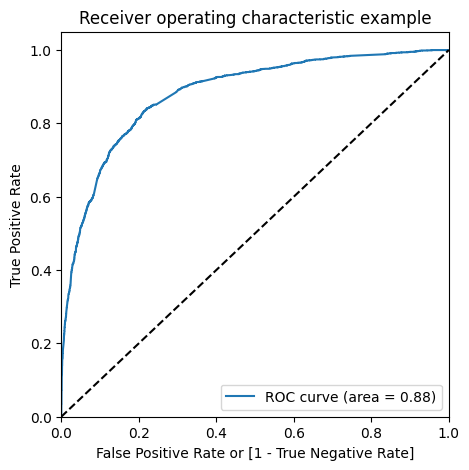

In [318]:
# Calling the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve of the ROC is 0.88 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [319]:
# Let's create columns with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.255572,0,1,1,1,0,0,0,0,0,0,0
1,0,0.190778,0,1,1,0,0,0,0,0,0,0,0
2,0,0.296923,0,1,1,1,0,0,0,0,0,0,0
3,0,0.851316,1,1,1,1,1,1,1,1,1,1,0
4,0,0.185049,0,1,1,0,0,0,0,0,0,0,0


In [320]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at
# different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.597712  0.971208  0.367566
0.2   0.2  0.751391  0.910381  0.653423
0.3   0.3  0.804113  0.830900  0.787606
0.4   0.4  0.812307  0.765207  0.841329
0.5   0.5  0.812307  0.694242  0.885057
0.6   0.6  0.796537  0.587186  0.925537
0.7   0.7  0.784323  0.513788  0.951024
0.8   0.8  0.759122  0.416869  0.970015
0.9   0.9  0.716296  0.276156  0.987506


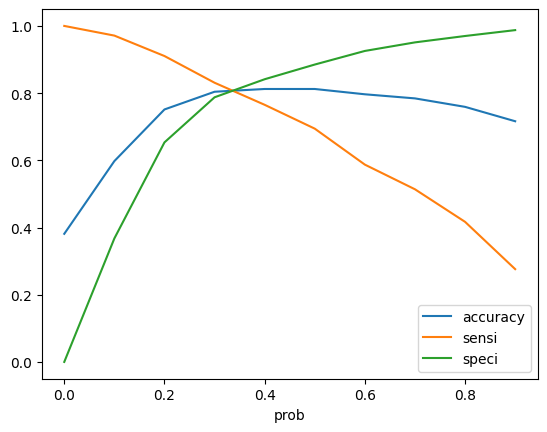

In [321]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As you can see that around 0.3, you get the optimal values of the three metrics. So let's choose 0.3 as our cutoff now.

In [322]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head(10)

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.255572,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.190778,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.296923,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.851316,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.185049,0,1,1,0,0,0,0,0,0,0,0,0
5,1,0.990821,1,1,1,1,1,1,1,1,1,1,1,1
6,0,0.136389,0,1,1,0,0,0,0,0,0,0,0,0
7,1,0.990138,1,1,1,1,1,1,1,1,1,1,1,1
8,0,0.139211,0,1,1,0,0,0,0,0,0,0,0,0
9,1,0.916494,1,1,1,1,1,1,1,1,1,1,1,1


## Precision and Recall

In [323]:
# Let's checking the `accuracy` now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8041125541125541

In [324]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3152,  850],
       [ 417, 2049]])

In [325]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [326]:
# Calculating the 'Sensitivity'

TP/(TP+FN)

0.8309002433090025

In [327]:
# Calculating the 'Specificity'

TN/(TN+FP)

0.7876061969015492

In [328]:
# Let's see the Precision of our logistic regression model
print("Precision  of the model on test data is:",TP / (TP + FP))

Precision  of the model on test data is: 0.7067954467057606


In [329]:
# Let us calculate Recall
print("Recall of the model on test data is:",TP / (TP + FN))

Recall of the model on test data is: 0.8309002433090025


This cutoff point seems good to go!

Precision and Recall Trade-Off


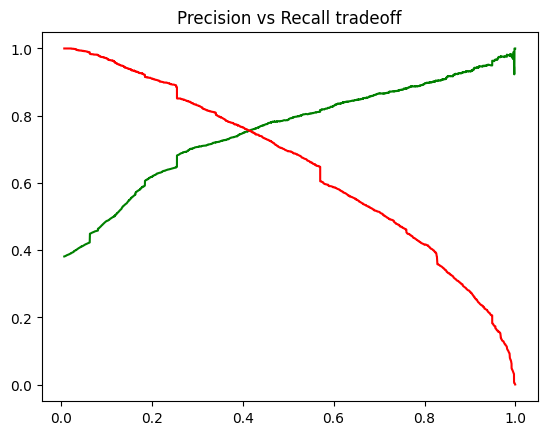

In [330]:
from sklearn.metrics import precision_recall_curve
# Creating precision recall curve by crreating three points and plotting

p ,r, thresholds = precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.Conversion_Prob)
plt.title('Precision vs Recall tradeoff')
plt.plot(thresholds, p[:-1], "g-")    # Plotting precision
plt.plot(thresholds, r[:-1], "r-")    # Plotting Recall
plt.show()

# Making Predictions on the Test Set

In [331]:
#Applying scaler to all numerical columns
num_var = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
X_test[num_var] = scaler.fit_transform(X_test[num_var])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4269,0,1.710715,0.933036,1.229677,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2376,0,-1.243077,-0.900812,-1.373550,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7766,0,0.866774,-0.793792,1.229677,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9199,0,-1.243077,-0.900812,-1.373550,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4359,0,-1.243077,-0.900812,-1.373550,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [332]:
X_test = X_test[col]
X_test.head(10)

,Do Not Email,Total Time Spent on Website,Lead Source_Direct Traffic,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
4269,0,0.933036,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2376,0,-0.900812,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
7766,0,-0.793792,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9199,0,-0.900812,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4359,0,-0.900812,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
9186,0,0.209292,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1631,0,0.936664,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8963,0,-0.414688,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8007,0,-0.276832,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
5324,0,-0.610588,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [333]:
X_test_sm = sm.add_constant(X_test[col])
X_test_sm.head(10)


,const,Do Not Email,Total Time Spent on Website,Lead Source_Direct Traffic,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
4269,1.0,0,0.933036,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2376,1.0,0,-0.900812,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
7766,1.0,0,-0.793792,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9199,1.0,0,-0.900812,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4359,1.0,0,-0.900812,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
9186,1.0,0,0.209292,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1631,1.0,0,0.936664,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8963,1.0,0,-0.414688,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8007,1.0,0,-0.276832,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
5324,1.0,0,-0.610588,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [334]:
y_test_pred = res.predict(X_test_sm)

In [335]:
y_test_pred[:10]

4269    0.710660
2376    0.947996
7766    0.861233
9199    0.062775
4359    0.824879
9186    0.624937
1631    0.483515
8963    0.181078
8007    0.059273
5324    0.409753
dtype: float64

In [336]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [337]:
# Let's see the head
y_pred_1.head()

,0
4269,0.710660
2376,0.947996
7766,0.861233
9199,0.062775
4359,0.824879


In [338]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [339]:
# Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [340]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [341]:
y_pred_final.head()

,Converted,0
0,1,0.710660
1,1,0.947996
2,1,0.861233
3,0,0.062775
4,1,0.824879


In [342]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [343]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.710660
1,1,0.947996
2,1,0.861233
3,0,0.062775
4,1,0.824879


In [344]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [345]:
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.710660,1
1,1,0.947996,1
2,1,0.861233,1
3,0,0.062775,0
4,1,0.824879,1


In [346]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.806998556998557

In [347]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1331,  346],
       [ 189,  906]])

In [348]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [349]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8273972602739726

In [350]:
# Let us calculate specificity
TN / float(TN+FP)

0.7936791890280263

# Summary

Start by identifying the most promising leads in the initial stage, prioritizing those with a significant 'Total Time Spent on Website,' as it strongly influences the probability of conversion. Once identified, maintain a comprehensive list of these leads for targeted communication regarding new courses, services, job opportunities, and future educational offerings.

Nurture these potential leads by tailoring information to their interests, ensuring a strategic approach in providing relevant job offerings and course details. Create a personalized plan to understand and address the unique needs of each lead, fostering a stronger connection.

Place a specific focus on leads that have successfully converted. Conduct question-answer sessions to gather essential information about them, and schedule follow-up inquiries and appointments. This proactive approach will help determine their intentions and mindset, particularly in their interest to enroll in online courses.